In [1]:
# Importing Libraries

# Importing NPV Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', 150, 'display.max_columns', 200)

In [211]:
data = pd.read_csv(r"D:\7 Great Learning Oct 2022\0 Codes\X Cap Stone Project\Codes\Interim Report\final_date_after_leakage.csv")

In [212]:
data.shape

(188166, 76)

In [213]:
data.drop('Unnamed: 0', axis = 1, inplace=True)

In [214]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default
0,4500,36 months,11.31,147.99,B,B3,Accounts Examiner III,10 years,RENT,38500.0,Not Verified,2018-12-01,credit_card,Credit card refinancing,786xx,TX,4.64,0.0,2003-12-01,0.0,12.0,0.0,4472,15.3,25.0,0.0,0.0,306.0,29137.0,2.0,1.0,1.0,1.0,24665.0,100.0,3.0,7.0,3612.0,54.0,29200.0,0.0,3.0,3.0,8.0,2428.0,10735.0,28.9,0.0,0.0,180.0,69.0,2.0,2.0,0.0,1.0,3.0,5.0,5.0,6.0,10.0,11.0,15.0,5.0,12.0,0.0,4.0,91.7,0.0,0.0,0.0,53795.0,29137.0,15100.0,24595.0,0
1,20000,60 months,17.97,507.55,D,D1,Front office Lead,4 years,RENT,57000.0,Not Verified,2018-12-01,debt_consolidation,Debt consolidation,981xx,WA,22.18,0.0,1995-04-01,0.0,10.0,0.0,33356,45.9,16.0,0.0,0.0,0.0,33356.0,2.0,0.0,0.0,0.0,0.0,NaN,2.0,3.0,18416.0,46.0,72700.0,0.0,0.0,0.0,3.0,3336.0,32170.0,50.4,0.0,0.0,78.0,284.0,5.0,5.0,1.0,0.0,4.0,7.0,6.0,9.0,1.0,10.0,14.0,7.0,10.0,0.0,2.0,100.0,33.3,0.0,0.0,72700.0,33356.0,64800.0,0.0,0
2,6600,36 months,11.31,217.05,B,B3,Sewell collision center,10 years,RENT,45000.0,Not Verified,2018-12-01,credit_card,Credit card refinancing,750xx,TX,16.21,0.0,2009-04-01,0.0,6.0,0.0,6167,58.2,13.0,0.0,0.0,0.0,26836.0,0.0,2.0,0.0,0.0,20669.0,74.0,0.0,2.0,3356.0,70.0,10600.0,0.0,1.0,0.0,2.0,4473.0,4433.0,58.2,0.0,0.0,116.0,108.0,18.0,18.0,0.0,0.0,2.0,2.0,4.0,4.0,5.0,4.0,8.0,2.0,6.0,0.0,0.0,84.6,50.0,0.0,0.0,38607.0,26836.0,10600.0,28007.0,0
3,2500,36 months,13.56,84.92,C,C1,Manager,5 years,RENT,42000.0,Not Verified,2018-12-01,other,Other,194xx,PA,15.09,0.0,2004-03-01,0.0,3.0,0.0,3319,31.6,6.0,0.0,0.0,0.0,18649.0,1.0,1.0,0.0,1.0,15330.0,69.0,1.0,2.0,2792.0,57.0,10500.0,2.0,0.0,1.0,3.0,6216.0,7181.0,31.6,0.0,0.0,177.0,177.0,5.0,5.0,0.0,0.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,3.0,0.0,1.0,83.3,0.0,0.0,0.0,32582.0,18649.0,10500.0,22082.0,0
4,4000,36 months,17.97,144.55,D,D1,service advisor,5 years,MORTGAGE,60000.0,Source Verified,2018-12-01,house,Home buying,760xx,TX,19.10,0.0,2007-06-01,1.0,11.0,0.0,382,7.3,18.0,0.0,0.0,0.0,106556.0,2.0,3.0,3.0,4.0,45868.0,77.0,1.0,6.0,378.0,72.0,5200.0,3.0,0.0,3.0,10.0,9687.0,3818.0,9.1,0.0,0.0,57.0,31.0,12.0,1.0,2.0,1.0,2.0,2.0,5.0,5.0,9.0,7.0,7.0,2.0,11.0,0.0,4.0,88.2,0.0,0.0,0.0,127200.0,46250.0,4200.0,59474.0,0


-------------------

-------------------------------------------------------
# Exploratory data analysis (EDA)
-------------------------------------------------------

In [6]:
df5 = data.copy()

### Function for Numerical Columns:
- 5 Point Summary
- Skewness
- Number of Outliers
- Number of Inliers
- Number and Percentage of Missing Values
- Univariate
- Bivariate
- Statistical Analysis
    - Two Sample Independent T Test
    - ANOVA Test

### Function for Categorical Columns:
- Number of Unique Categories
- Number and Percentage of Missing Values
- Univariate
- Bivariate
- Statistical Analysis
    - Chi Square Contingency Test

#### Function

In [7]:
def analysis(df,x,y):
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import scipy.stats as stats
    from statsmodels.stats.anova import anova_lm
    from statsmodels.formula.api import ols
    if x in df.select_dtypes(include=np.number).columns:
        li1,li2=[],[]
        li = df[y].unique()
        q1 = df[x].describe()[4]
        q3 = df[x].describe()[6]
        iqr = q3 - q1
        up = q3 + 1.5*iqr
        low = q1 - 1.5*iqr
        for i in li:
            li1=df.loc[df[y]==li[0],x]
            li2=df.loc[df[y]==li[1],x]
        print('======================================',x,'======================================\n\n')
        print('5 Point Summary\n--------------------')
        print(df[x].describe())
        print('\nNumber of Inliers  :',len(df.loc[df[x]<low,x]))
        print('Number of Outliers :',len(df.loc[df[x]>up,x]))
        print('\nNumber of Missing Values :',df.loc[df[x].isnull(),x].shape[0])
        print('Percent of Missing Values :',(df.loc[df[x].isnull(),x].shape[0]/df.shape[0])*100)
        print('\nStatistical Analysis (p-value) by using Two Sample ttest :',round(stats.ttest_ind(li1,li2)[1],5))
        print('Statistical Analysis (p-value) by using Anova test :',round(anova_lm(ols('%s~%s'%(x,y),data=df).fit()).iloc[0,4],5))
        if stats.ttest_ind(li1,li2)[1]>0.05:
            print(y,'is not related to',x)
        else:
            print(y,'is related to',x)
        sns.distplot(df[x])
        plt.title('Skewness = %.3f'%(df[x].skew()))
        plt.show()
        sns.boxplot(df[x])
        plt.title('Univariate Analysis (Boxplot)')
        plt.show()
        sns.boxplot(df[y],df[x])
        plt.title('Bivariate Analysis (Boxplot)')
        plt.show()
        print('\n\n\n\n')
    else:
        print('======================================',x,'======================================\n\n')
        print('Number of Unique Categories :\n--------------------')
        print(pd.concat((df[x].value_counts(),df[x].value_counts(normalize=True)),axis=1))
        print('\nNumber of Missing Values :',df.loc[df[x].isnull(),x].shape[0])
        print('Percent of Missing Values :',(df.loc[df[x].isnull(),x].shape[0]/df.shape[0])*100)
        print('\nStatistical Analysis (p-value) by using Chiaquare Contingency test:',\
              round(stats.chi2_contingency(pd.crosstab(df[x],df[y]))[1],5))
        if stats.chi2_contingency(pd.crosstab(df[x],df[y]))[1]>0.05:
            print(y,'is not related to',x)
        else:
            print(y,'is related to',x)
        sns.countplot(df[x])
        plt.title('Univariate Analysis (Countplot)')
        plt.show()
        pd.crosstab(df[x],df[y]).plot(kind='bar')
        plt.title('Bivariate Analysis (Crosstab Bar Plot)')
        plt.show()
        print('\n\n\n\n')

In [8]:
all_cols = data.columns
len(all_cols)

75

# -----------------------

In [9]:
df5.isnull().mean()[df5.isnull().mean()> 0]*100

emp_title              6.961406
emp_length             6.728633
zip_code               0.000531
revol_util             0.086626
il_util               13.935568
all_util               0.012223
avg_cur_bal            0.003720
bc_open_to_buy         1.285567
bc_util                1.344026
mo_sin_old_il_acct     2.681675
pct_tl_nvr_dlq         0.000531
percent_bc_gt_75       1.287693
dtype: float64

In [10]:
df5.zip_code

0         786xx
1         981xx
2         750xx
3         194xx
4         760xx
          ...  
188161    841xx
188162    112xx
188163    799xx
188164    600xx
188165    119xx
Name: zip_code, Length: 188166, dtype: object

In [11]:
df5.zip_code.fillna('00000',inplace=True)

In [12]:
df5['zip_code'] = df5.zip_code.apply(lambda x:x[:3])

-----------
# 1. loan_amnt
- It represents the total amount of the loan applied for by the borrower.

====================================== loan_amnt ======================================


5 Point Summary
--------------------
count    188166.000000
mean      14029.065825
std        9424.194211
min        1000.000000
25%        6600.000000
50%       12000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

Number of Inliers  : 0
Number of Outliers : 0

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to loan_amnt


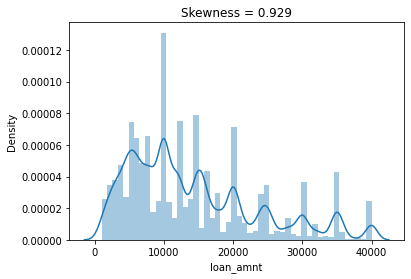

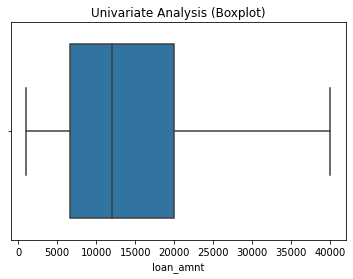

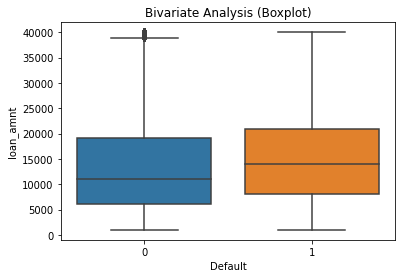

In [13]:
analysis(df5, 'loan_amnt', 'Default')

In [14]:
df5.groupby('Default')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,13602.785262,9326.296229,1000.0,6025.0,11000.0,19200.0,40000.0
1,38970.0,15661.073903,9616.980704,1000.0,8000.0,14000.0,21000.0,40000.0


### Inferences: loan_amnt

- A Customer is likely to default however, this does not depend on the loan amount.
- There can be additional factors behind that compel a customer to default however, loan amount is not the driving factor.
- One thing that we can infer is that the people who default have a little higher median loan amount disbursed to them which is clearly visible in the Statistical Summary.
- Using Statistical prowess, we can validate that the Loan amount is the most important feature/driving force behind the problem.

-------------
# 2. term
-  Number of payments for the loan: values are in months (either 36 or 60 Months).

====================================== term ======================================


Number of Unique Categories :
--------------------
              term      term
 36 months  143763  0.764022
 60 months   44403  0.235978

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Chiaquare Contingency test: 0.0
Default is related to term


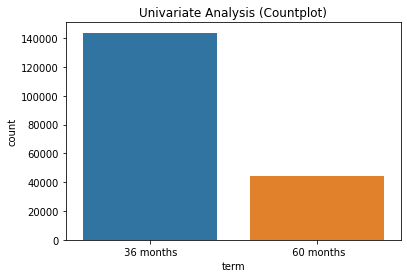

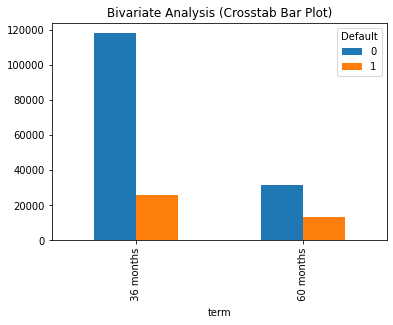

In [15]:
analysis(df5, 'term', 'Default')

In [16]:
df5.groupby('term')['Default'].value_counts(normalize = True)*100

term        Default
 36 months  0          81.999541
            1          18.000459
 60 months  0          70.515506
            1          29.484494
Name: Default, dtype: float64

### Univariate Analysis:
* A customer has mostly opted for a loan of 36 months.

### Bivariate Analysis
* A customer who borrowed a loan of 60 months is more likely to default in comparison to the one with 36 months as depicted in the graph.

-----------
# 3. int_rate
- Interest rate on the loan.

In [17]:
# analysis(df5, 'int_rate', 'Default')

In [18]:
# df5.groupby('Default')['int_rate'].describe()

# NOTE: Reason for removing int_rate
- **When you apply for a loan through Lending Club, the platform will use a proprietary algorithm to assess your creditworthiness and assign you a credit grade (A, B, C, etc.) and an interest rate. Generally, borrowers with higher credit grades and lower credit utilization ratios are considered less risky and are therefore eligible for lower interest rates.**

- **The interest rate that you receive from Lending Club will depend on several factors, including your creditworthiness, the loan amount and term, and current market conditions.** 

------------
# 4. installment
- Monthly payment owed by the borrower.

In [19]:
# analysis(df5, 'installment', 'Default')

In [20]:
# df5.corr()['installment']

In [21]:
# df5.groupby('Default')['installment'].describe()

# NOTE: Removed as it is calculated using int_rate.

--------
# 5. grade
- Assigned to the loan based on the borrower's creditworthiness.

In [22]:
# analysis(df5, 'grade', 'Default')

In [23]:
# df5.groupby('grade')['Default'].value_counts(normalize = True)*100

## NOTE: Remove 'grade' as it is assigned to the loans after the loan is approved by the Lending Club Platform.

--------
# 6. sub_grade
- Assigned to the loan based on the borrower's creditworthiness (sub-categorization of Grade). 

In [24]:
# analysis(df5, 'sub_grade', 'Default')

In [25]:
# df5.groupby('sub_grade')['Default'].value_counts(normalize = True)*100

In [26]:
# len(df5.sub_grade.unique())

## NOTE: Remove 'sub_grade' as it is assigned to the loans after the loan is approved by the Lending Club Platform.

--------
# 7. emp_title
- The job title provided by the borrower when applying for the loan

In [27]:
df5.emp_title.unique()

array(['Accounts Examiner III', 'Front office Lead',
       'Sewell collision center', ..., 'Sr. Principal IT Archtiect',
       'Acft mechanic', 'Instructional Designer '], dtype=object)

In [28]:
len(df5.emp_title.unique())

59990

### Inferences: emp_title
- As the data contains 59990 unique values, we will remove this column.
- To know more about the employment history of the person, we will consider the other columns like annual income and employment length.

# NOTE: Will be used during Feature Engineering

-------
# 8. emp_length 
- Employment length of the borrower in years.

====================================== emp_length ======================================


Number of Unique Categories :
--------------------
          emp_length  emp_length
10 years       64358    0.366702
2 years        17580    0.100168
3 years        15657    0.089211
0 years        13501    0.076927
1 year         12785    0.072847
4 years        11911    0.067867
5 years        11876    0.067668
6 years         8436    0.048067
7 years         7035    0.040084
9 years         6466    0.036842
8 years         5900    0.033617

Number of Missing Values : 12661
Percent of Missing Values : 6.728633228107096

Statistical Analysis (p-value) by using Chiaquare Contingency test: 0.0
Default is related to emp_length


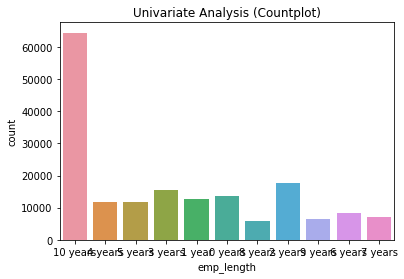

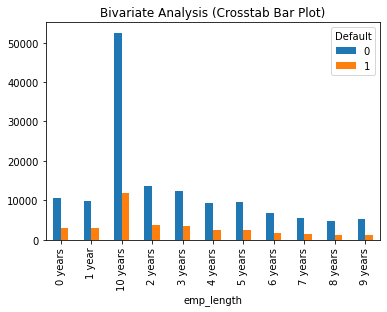

In [29]:
analysis(df5, 'emp_length', 'Default')

In [30]:
df5.groupby('emp_length')['Default'].value_counts(normalize = True)

emp_length  Default
0 years     0          0.786016
            1          0.213984
1 year      0          0.775284
            1          0.224716
10 years    0          0.816775
            1          0.183225
2 years     0          0.781456
            1          0.218544
3 years     0          0.783867
            1          0.216133
4 years     0          0.786584
            1          0.213416
5 years     0          0.794038
            1          0.205962
6 years     0          0.803224
            1          0.196776
7 years     0          0.792608
            1          0.207392
8 years     0          0.793390
            1          0.206610
9 years     0          0.808692
            1          0.191308
Name: Default, dtype: float64

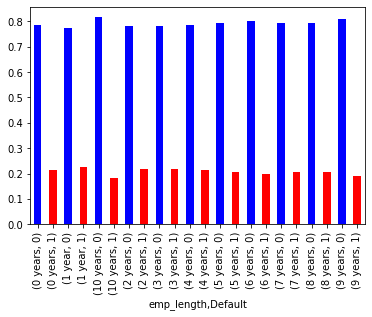

In [31]:
df5.groupby('emp_length')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b','r'])
plt.show()

### Inferences: emp_length
#### Univariate Analysis: 
- There 11 catagories: From 0 to 10 , 0 indicate length less than 1 year, 1 to 9 with the same experience and 10 indicate the length of employment more than 10 years.
- Majority of the borrowers (36.7%) have employment length more than10 years.

#### Bivariate Analysis:
- **There is no such variation seen among the categories between the Defaulters and Non-defaulters** (in terms of proportion of the loans they got).

#### Statistical Tests:
- **By doing Chi Square Contingency Test: 'emp_length' is an important feature.**

#### NOTE: Target Encoding

------
# 9. home_ownership
- The home ownership status provided by the borrower during the registration or obtained from the credit report.

====================================== home_ownership ======================================


Number of Unique Categories :
--------------------
          home_ownership  home_ownership
MORTGAGE           91687        0.487267
RENT               72652        0.386106
OWN                23622        0.125538
ANY                  204        0.001084
NONE                   1        0.000005

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Chiaquare Contingency test: 0.0
Default is related to home_ownership


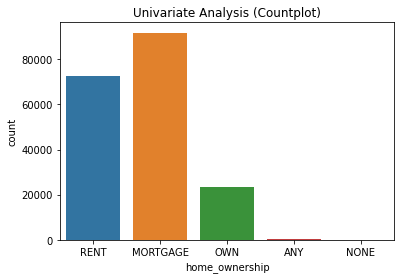

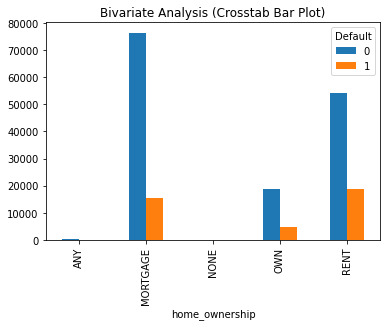

In [32]:
analysis(df5, 'home_ownership', 'Default')

In [33]:
df5.groupby('home_ownership')['Default'].value_counts(normalize = True)*100

home_ownership  Default
ANY             0           81.862745
                1           18.137255
MORTGAGE        0           83.257168
                1           16.742832
NONE            0          100.000000
OWN             0           79.167725
                1           20.832275
RENT            0           74.314541
                1           25.685459
Name: Default, dtype: float64

### Inferences: home_ownership
#### Univariate Analysis: 
- Most borrowers either own a home with a mortgage (48.7%) or rent their home (38.6%). A smaller proportion of borrowers own their home outright (12.5%) or have some other form of home ownership (.11%).

#### Bivariate Analysis:
- Borrowers who rent (25.7%) their home have a higher proportion of Default loans compared to borrowers who own their home with a mortgage (16.8%), though home_wonership is not the only feature on which Default is depend on.

#### Statistical Tests:
- **By doing Chi Square Contingency Test: 'home_ownership' is an important feature.**

-----
# 10. annual_inc
- The self-reported annual income provided by the borrower during the registration

====================================== annual_inc ======================================


5 Point Summary
--------------------
count    1.881660e+05
mean     8.125353e+04
std      8.025058e+04
min      2.400000e+03
25%      4.993100e+04
50%      6.900000e+04
75%      9.700000e+04
max      1.099920e+07
Name: annual_inc, dtype: float64

Number of Inliers  : 0
Number of Outliers : 9448

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to annual_inc


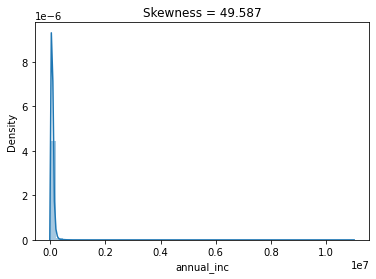

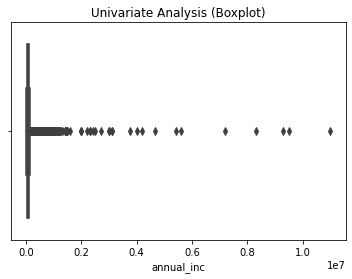

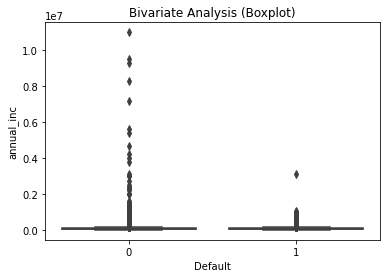

In [34]:
analysis(df5, 'annual_inc', 'Default')

In [35]:
# df5.corr()['Default']

In [36]:
df5.groupby('Default')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,82826.289735,86223.243989,2500.0,50000.0,70000.0,99500.0,10999200.0
1,38970.0,75232.228064,50871.294869,2400.0,45000.0,65000.0,90000.0,3098500.0


### Inferences: annual_inc
- Defaulter have lower mean and median than the Fully paid borrowers.
- We can infer that borrowers who have lower annual income are more likely to default. But annual income is not the only feature on which Default status of the individual depend on.

#### Statistical Tests:
- **By doing Two Sample T Test and ANOVA: 'annual_inc' is an important feature.**

-------
# 11. verification_status
- The verification status is one of the variables that Lending Club collects from borrowers, indicating whether the borrower's income has been verified or not.

====================================== verification_status ======================================


Number of Unique Categories :
--------------------
                 verification_status  verification_status
Source Verified                76715             0.407699
Not Verified                   64367             0.342076
Verified                       47084             0.250226

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Chiaquare Contingency test: 0.0
Default is related to verification_status


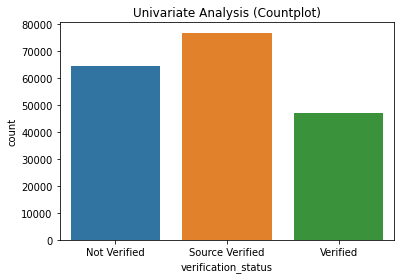

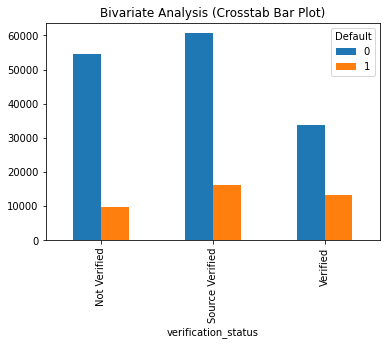

In [37]:
analysis(df5, 'verification_status', 'Default')

In [38]:
df5.groupby('verification_status')['Default'].value_counts(normalize = True)

verification_status  Default
Not Verified         0          0.849535
                     1          0.150465
Source Verified      0          0.790093
                     1          0.209907
Verified             0          0.720032
                     1          0.279968
Name: Default, dtype: float64

### Inferences: verification_status
#### Univariate Analysis: 
- There 3 catagories: Source Verified, Not Verified and Verified.
- Majority of the income of the borrowers are Source verified (40.7%). 

#### Bivariate Analysis:
- Proportion of the Defaulters is minimum in the Not-Verified category followed by Source-Verified and Verified. 
- This trend is in contrast with the norm, because Verified income sources are more reliable.

#### Statistical Tests:
- **By doing Chi Square Contingency Test: 'verification_status' is an important feature.**

------
# 12. issue_d
- The month in which the loan is issued.

In [39]:
# analysis(df5, 'issue_d', 'Default')

### Inferences: issue_d
- We will drop this column right before modeling of the project.
- Maybe it may come helpful in some feature engineering part.

------
# 13. purpose
- A category provided by the borrower for what purpose the borrower is taking the loan.

====================================== purpose ======================================


Number of Unique Categories :
--------------------
                    purpose   purpose
debt_consolidation   102439  0.544408
credit_card           36561  0.194302
other                 15456  0.082140
home_improvement      15246  0.081024
major_purchase         5154  0.027391
medical                3105  0.016501
car                    2486  0.013212
small_business         2008  0.010671
vacation               1955  0.010390
house                  1939  0.010305
moving                 1674  0.008896
renewable_energy        141  0.000749
wedding                   2  0.000011

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Chiaquare Contingency test: 0.0
Default is related to purpose


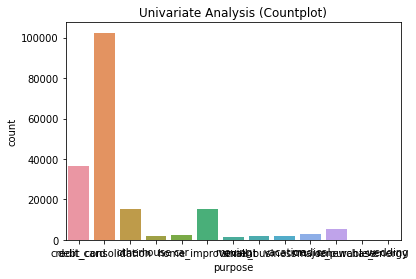

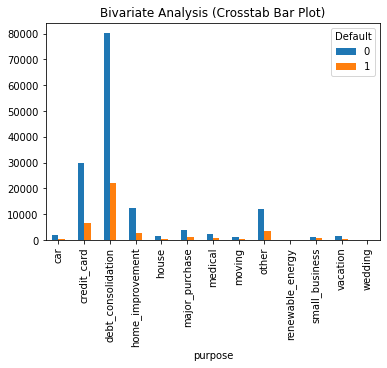

In [40]:
analysis(df5, 'purpose', 'Default')

In [41]:
df5.groupby('purpose')['Default'].value_counts(normalize = True)
# df5.purpose.value_counts(normalize = True)

purpose             Default
car                 0          0.855189
                    1          0.144811
credit_card         0          0.819452
                    1          0.180548
debt_consolidation  0          0.783764
                    1          0.216236
home_improvement    0          0.816936
                    1          0.183064
house               0          0.802476
                    1          0.197524
major_purchase      0          0.783275
                    1          0.216725
medical             0          0.775845
                    1          0.224155
moving              0          0.756272
                    1          0.243728
other               0          0.782803
                    1          0.217197
renewable_energy    0          0.765957
                    1          0.234043
small_business      0          0.650896
                    1          0.349104
vacation            0          0.810230
                    1          0.189770
wedding     

### Inferences: purpose
#### Univariate Analysis: 
- There 13 catagories: with maximum loan taken for the purpose of Debt-Consolidation (54.4%), followed by Credit Card and so on. 

#### Bivariate Analysis:
- Proportion of Default is maximum for Samll Businees (35% Default) and least for Car loans.

#### Statistical Tests:
- **By doing Chi Square Contingency Test: 'purpose' is an important feature.**

#### NOTE: As around 50% of the loan belong to Debt consolidation, we may reduce the number of Categories by combining them.

-----
# 14. title
- Loan title provided by the borrower

====================================== title ======================================


Number of Unique Categories :
--------------------
                          title     title
Debt consolidation       102435  0.544386
Credit card refinancing   36566  0.194328
Other                     15457  0.082146
Home improvement          15245  0.081019
Major purchase             5152  0.027380
Medical expenses           3105  0.016501
Car financing              2488  0.013222
Business                   2010  0.010682
Vacation                   1955  0.010390
Home buying                1939  0.010305
Moving and relocation      1673  0.008891
Green loan                  141  0.000749

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Chiaquare Contingency test: 0.0
Default is related to title


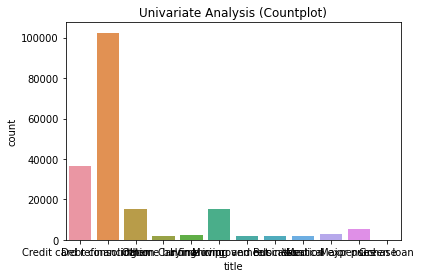

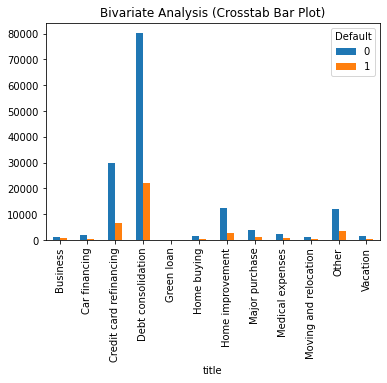

In [42]:
analysis(df5, 'title', 'Default')

In [43]:
df5.title.value_counts()

Debt consolidation         102435
Credit card refinancing     36566
Other                       15457
Home improvement            15245
Major purchase               5152
Medical expenses             3105
Car financing                2488
Business                     2010
Vacation                     1955
Home buying                  1939
Moving and relocation        1673
Green loan                    141
Name: title, dtype: int64

# Inferences: title
### As Purpose and Title are presenting the same data, we can drop one of them.

# ---------------------------------------------------------

--------
# 15. zip_code
- The first 3 numbers of the zip code provided by the borrower in the loan application.

In [44]:
# analysis(df5,'zip_code','Default')

### Inferences: zip_code

#### Univariate Analysis: 
- The zip_code has 887 unique values.

### NOTE: Will be dealt in Feature Enginnering part

--------
# 16. addr_state
- The state provided by the borrower in the loan application

====================================== addr_state ======================================


Number of Unique Categories :
--------------------
    addr_state  addr_state
CA       27551    0.146419
TX       15576    0.082778
NY       14942    0.079409
FL       14074    0.074796
IL        6647    0.035325
NJ        6285    0.033401
PA        6005    0.031913
GA        5887    0.031286
OH        5606    0.029793
NC        5425    0.028831
VA        5076    0.026976
MI        5042    0.026795
AZ        4899    0.026036
CO        4630    0.024606
MD        4479    0.023803
MA        4386    0.023309
WA        4122    0.021906
MN        3377    0.017947
NV        3257    0.017309
IN        3220    0.017113
TN        2953    0.015694
MO        2832    0.015051
CT        2705    0.014376
WI        2434    0.012935
OR        2306    0.012255
SC        2299    0.012218
AL        2247    0.011942
LA        2049    0.010889
KY        1751    0.009306
OK        1587    0.008434
UT        1541    0.0

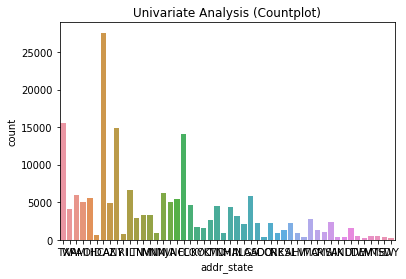

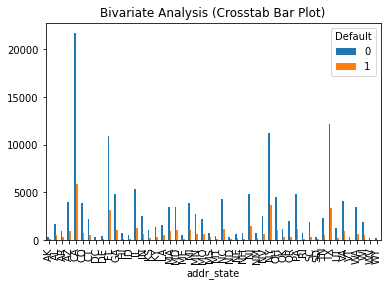

In [45]:
analysis(df5,'addr_state','Default')

# Inference:
- Not much is inferred from the plot.

#### Statistical Tests:
- *By doing Chi Square Contingency Test: 'addr_state' is an important feature.*

--------
# 17. dti
- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

====================================== dti ======================================


5 Point Summary
--------------------
count    188166.000000
mean         17.434135
std           8.347130
min           0.000000
25%          11.170000
50%          17.020000
75%          23.460000
max          39.990000
Name: dti, dtype: float64

Number of Inliers  : 0
Number of Outliers : 0

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to dti


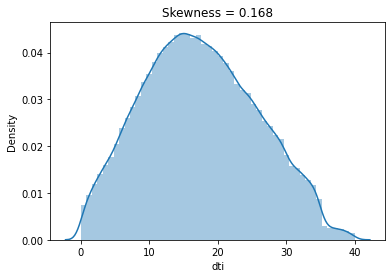

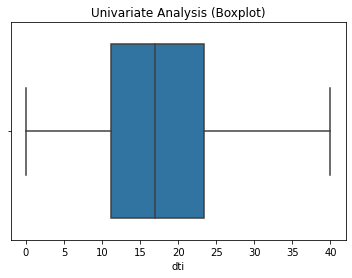

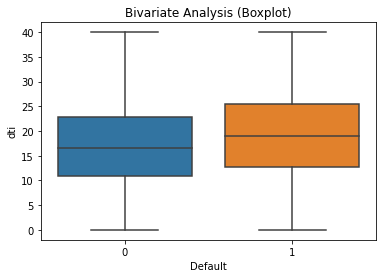

In [46]:
analysis(df5,'dti' ,'Default')

In [47]:
df5.groupby('Default')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,17.011197,8.242190,0.0,10.84,16.52,22.82,39.99
1,38970.0,19.053344,8.546031,0.0,12.70,19.09,25.55,39.98


### Inferences: 

#### Bivariate Analysis:
- dti (The ratio calculated using the borrowers total installments/ total monthly income) tells that **if they borrow high, their chances to default are high.**
    - This trend is visible from the statistical summary but DTi is not the only factor on which Default status of the individual depend on.

#### Statistical Tests:
- **By doing Two Sample T Test and ANOVA: 'dti' is an important feature.**

--------
# 18. delinq_2yrs
- The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

====================================== delinq_2yrs ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.302967
std           0.871643
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: delinq_2yrs, dtype: float64

Number of Inliers  : 0
Number of Outliers : 34561

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to delinq_2yrs


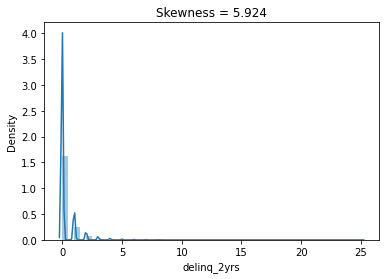

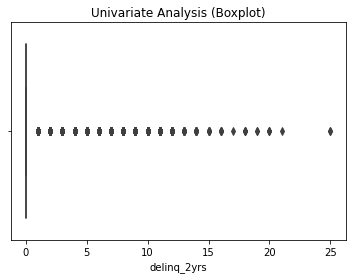

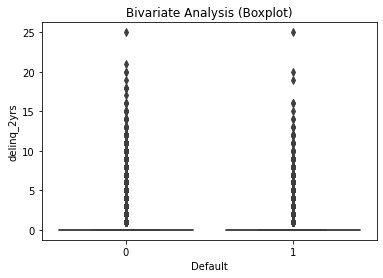

In [48]:
analysis(df5,'delinq_2yrs','Default')

<AxesSubplot: xlabel='delinq_2yrs,Default'>

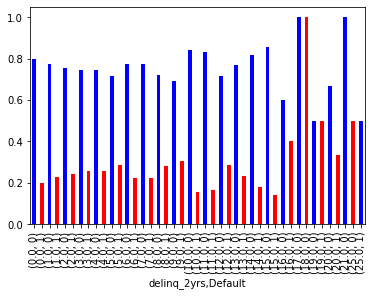

In [49]:
df5.groupby('delinq_2yrs')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b', 'r'])

### Inferences: delinq_2yrs

- Business understanding: 
    - A higher value for delinq_2yrs may indicate that the borrower has had difficulty making payments in the past, which could be an indication of increased credit risk. 
    - On the other hand, a lower value for delinq_2yrs may indicate that the borrower has a good payment history, which could be an indication of lower credit risk. 

### No clear pattern is visible from the plots

#### Statistical Tests:
- *By doing Two Sample T Test and ANOVA: 'delinq_2yrs' is an important feature.*


--------
# 19. earliest_cr_line
-

In [50]:
# analysis(df5,'earliest_cr_line','Default')

In [51]:
df5.earliest_cr_line

0         2003-12-01
1         1995-04-01
2         2009-04-01
3         2004-03-01
4         2007-06-01
             ...    
188161    1981-08-01
188162    2001-12-01
188163    2004-09-01
188164    2000-12-01
188165    2001-03-01
Name: earliest_cr_line, Length: 188166, dtype: object

### Inferences: earliest_cr_line
- In date of the earliest credit line of the borrower.

### Note: It will be used during Feature Engineering: 
### Creating:: Credit Line Length = (issue_date - earliest_cr_line)

--------
# 20. inq_last_6mths
-

====================================== inq_last_6mths ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.592785
std           0.860694
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: inq_last_6mths, dtype: float64

Number of Inliers  : 0
Number of Outliers : 7400

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to inq_last_6mths


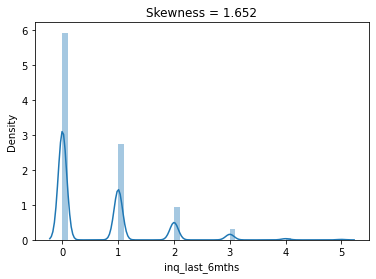

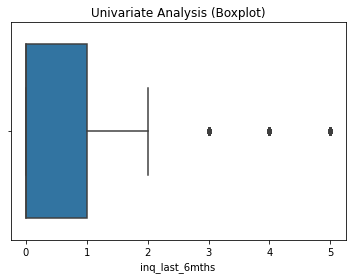

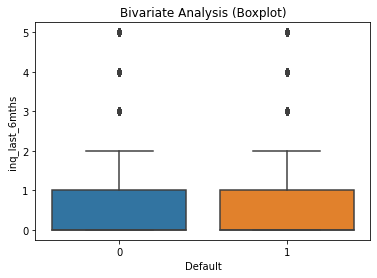

In [52]:
analysis(df5,'inq_last_6mths','Default')

In [53]:
df5.groupby('Default')['inq_last_6mths'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,0.559613,0.833113,0.0,0.0,0.0,1.0,5.0
1,38970.0,0.719784,0.948331,0.0,0.0,0.0,1.0,5.0


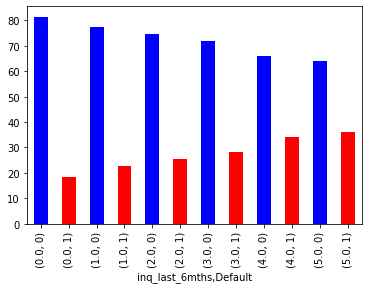

In [54]:
(df5.groupby('inq_last_6mths')['Default'].value_counts(normalize = True)*100).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

### Inferences: inq_last_6mnths

#### Business Understanding:
- A higher value for inq_last_6mths may indicate that the borrower has been actively seeking credit, which could be an indication of increased credit risk. 
- On the other hand, a lower value for inq_last_6mths may indicate that the borrower has not been actively seeking credit, which could be an indication of lower credit risk


#### Bivariate Analysis:
- **This suggests that as Inquries in the last 6 months increases, the possibility of loan default increases.** Though it is not the only factor on which the Default status of the individual depend on.

#### Statistical Tests:
- **By doing Two Sample T Test and ANOVA: 'inq_last_6mnths' is an important feature.**

### NOTE: Treat this like a Categorical Column: better result.

--------
# 21. open_acc
-

====================================== open_acc ======================================


5 Point Summary
--------------------
count    188166.000000
mean         11.659742
std           5.814049
min           0.000000
25%           8.000000
50%          11.000000
75%          15.000000
max          88.000000
Name: open_acc, dtype: float64

Number of Inliers  : 0
Number of Outliers : 5109

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.55856
Statistical Analysis (p-value) by using Anova test : 0.55856
Default is not related to open_acc


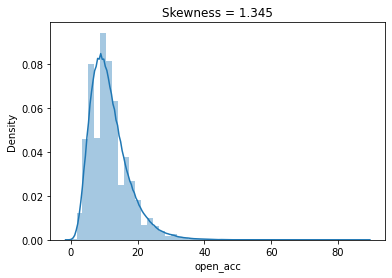

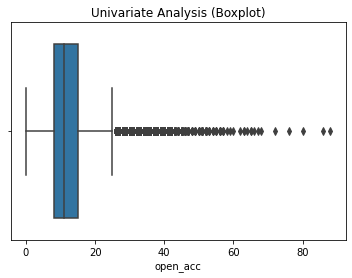

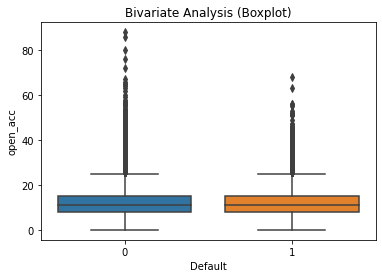

In [55]:
analysis(df5,'open_acc','Default')

In [56]:
#(df5.groupby('open_acc')['Default'].value_counts(normalize = True)*100).plot(kind = 'bar', color = ['b', 'r'])
#plt.show()

### Inferences: open_acc

* No inference can be drawn from the plot.

#### Statistical Tests:
- *By doing Two Sample T Test and ANOVA: 'open_acc' is not an important feature.*


--------
# pub_rec
-

====================================== pub_rec ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.226428
std           0.571890
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          28.000000
Name: pub_rec, dtype: float64

Number of Inliers  : 0
Number of Outliers : 35091

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to pub_rec


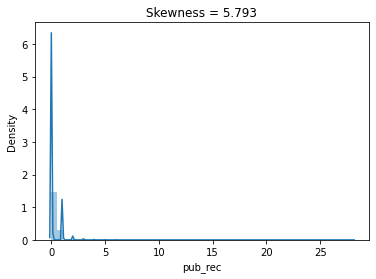

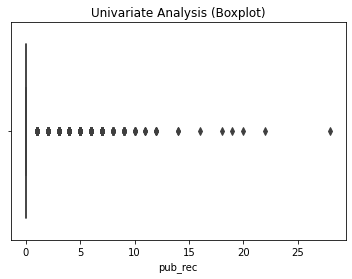

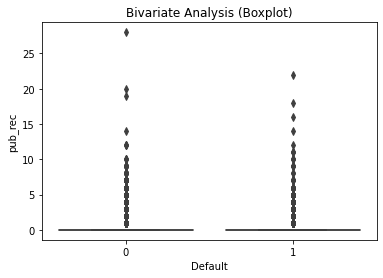

In [57]:
analysis(df5,'pub_rec','Default')

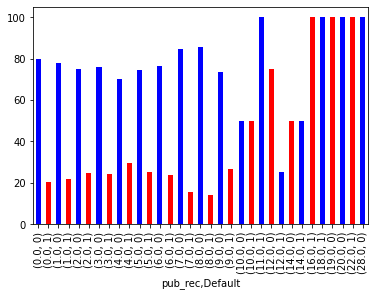

In [58]:
(df5.groupby('pub_rec')['Default'].value_counts(normalize = True)*100).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

### Inferences: pub_rec

#### Business Understanding:
- People with good public record are more likely to pay back the loan and not default. 

#### No uniform pattern is visible from the plot.

#### Statistical Tests:
- *By doing Two Sample T Test and ANOVA: 'pub_rec' is an important feature.*


--------
# revol_bal
-

====================================== revol_bal ======================================


5 Point Summary
--------------------
count    1.881660e+05
mean     1.510567e+04
std      2.221749e+04
min      0.000000e+00
25%      4.978000e+03
50%      9.897000e+03
75%      1.802800e+04
max      1.696796e+06
Name: revol_bal, dtype: float64

Number of Inliers  : 0
Number of Outliers : 12448

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.20267
Statistical Analysis (p-value) by using Anova test : 0.20267
Default is not related to revol_bal


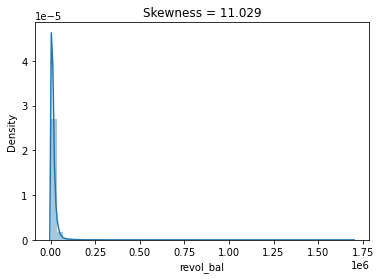

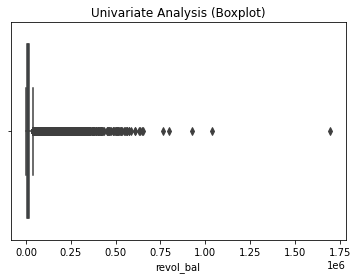

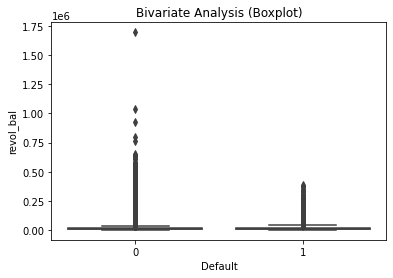

In [59]:
analysis(df5,'revol_bal','Default')

In [60]:
df5.groupby('Default')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,15139.021448,23221.716901,0.0,4871.00,9710.0,17856.00,1696796.0
1,38970.0,14977.999897,17857.976090,0.0,5457.25,10691.5,18633.75,389487.0


### Inferences: revol_bal


#### No inference is drawn from the plot or statistical summary.

#### Statistical Tests:
- *By doing Two Sample T Test and ANOVA: 'revol_bal' is not an important feature.*


--------
# revol_util

====================================== revol_util ======================================


5 Point Summary
--------------------
count    188003.000000
mean         44.075494
std          25.150955
min           0.000000
25%          24.100000
50%          42.500000
75%          62.600000
max         154.900000
Name: revol_util, dtype: float64

Number of Inliers  : 0
Number of Outliers : 9

Number of Missing Values : 163
Percent of Missing Values : 0.08662563906338021

Statistical Analysis (p-value) by using Two Sample ttest : nan
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to revol_util


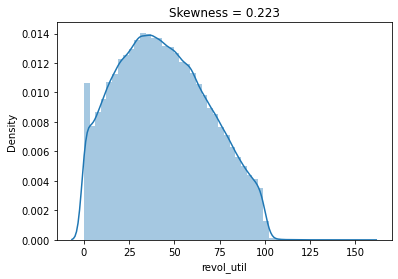

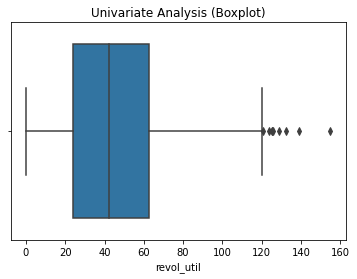

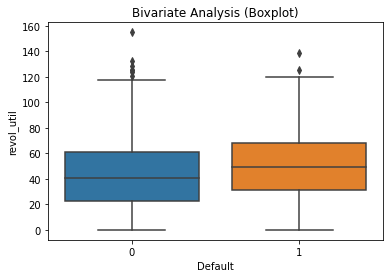

In [61]:
analysis(df5,'revol_util','Default')

In [62]:
df5.groupby('Default')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149066.0,42.616070,25.057609,0.0,22.5,40.6,61.0,154.9
1,38937.0,49.662737,24.721601,0.0,31.2,49.5,68.1,138.9


### Inferences: revol_util

* Definition: revolving utilization, which is the percentage of the borrower's total available credit that they are currently using.

#### No inference is drawn from the plot or statistical summary.

#### Statistical Tests:
- *By doing Two Sample T Test and ANOVA: 'revol_util' is an important feature.*


--------
# total_acc

====================================== total_acc ======================================


5 Point Summary
--------------------
count    188166.000000
mean         24.322263
std          12.359379
min           2.000000
25%          15.000000
50%          22.000000
75%          31.000000
max         151.000000
Name: total_acc, dtype: float64

Number of Inliers  : 0
Number of Outliers : 3850

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to total_acc


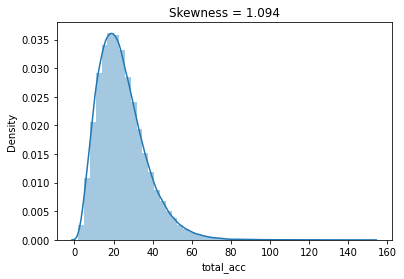

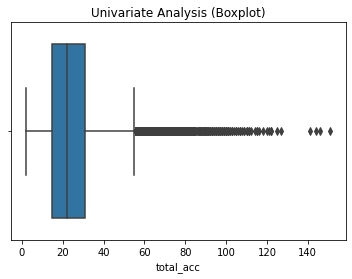

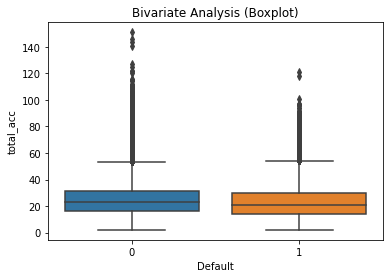

In [63]:
analysis(df5,'total_acc','Default')

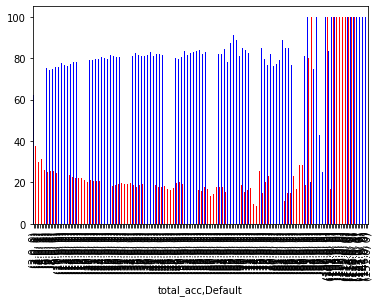

In [64]:
(df5.groupby('total_acc')['Default'].value_counts(normalize = True)*100).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

### Inferences: total_acc

* From the plot, we can infer that people having more number of accounts are more likely to payback the loan and not default. Though this is not the only factor on which the Default status of the individual depend on.

#### Statistical Tests:
- *By doing Two Sample T Test and ANOVA: 'total_acc' is an important feature.*


--------
# collections_12_mths_ex_med
-

====================================== collections_12_mths_ex_med ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.022315
std           0.166993
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.000000
Name: collections_12_mths_ex_med, dtype: float64

Number of Inliers  : 0
Number of Outliers : 3820

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to collections_12_mths_ex_med


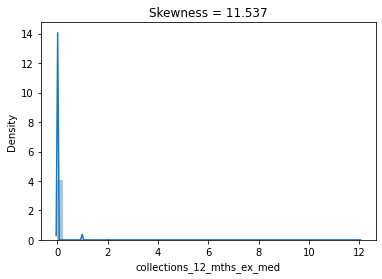

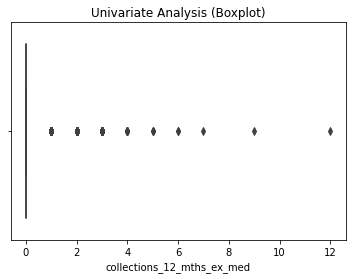

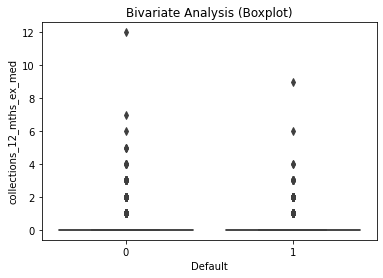

In [65]:
analysis(df5,'collections_12_mths_ex_med','Default')

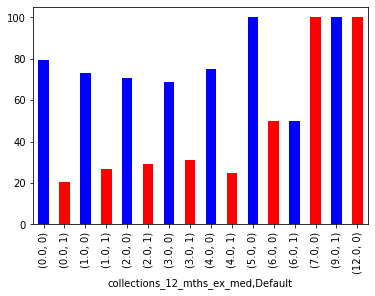

In [66]:
(df5.groupby('collections_12_mths_ex_med')['Default'].value_counts(normalize = True)*100).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

### Inferences: 'collections_12_mths_ex_med'

* Definition: represents the number of collections in the past 12 months excluding medical collections.

### Business Understanding:
* A higher value for collections_12_mths_ex_med may indicate that the borrower has had difficulty making payments in the past, which could be an indication of increased credit risk. 
* On the other hand, a lower value for collections_12_mths_ex_med may indicate that the borrower has a good payment history, which could be an indication of lower credit risk.

### No inference can be drawn from the plot. 

#### Statistical Tests:
- *By doing Two Sample T Test and ANOVA: 'collections_12_mths_ex_med' is an important feature.*


# -------------------------------------

In [67]:
df_p = df5.loc[:,['acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_act_il',
            'open_il_12m','open_il_24m','total_bal_il','il_util','open_rv_12m','open_rv_24m',
            'max_bal_bc','Default']]

====================================== acc_now_delinq ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.003763
std           0.064522
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: acc_now_delinq, dtype: float64

Number of Inliers  : 0
Number of Outliers : 674

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.00568
Statistical Analysis (p-value) by using Anova test : 0.00568
Default is related to acc_now_delinq


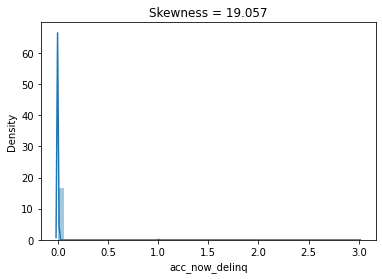

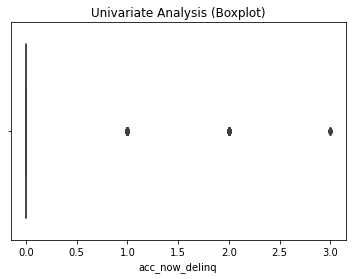

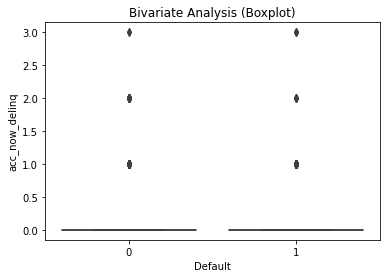






====================================== tot_coll_amt ======================================


5 Point Summary
--------------------
count    1.881660e+05
mean     2.994479e+02
std      1.895816e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.214661e+06
Name: tot_coll_amt, dtype: float64

Number of Inliers  : 0
Number of Outliers : 30648

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.58592
Statistical Analysis (p-value) by using Anova test : 0.58592
Default is not related to tot_coll_amt


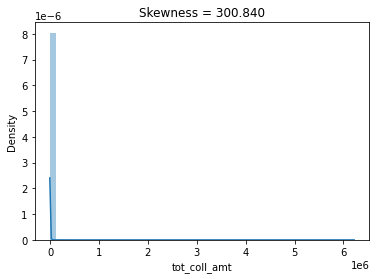

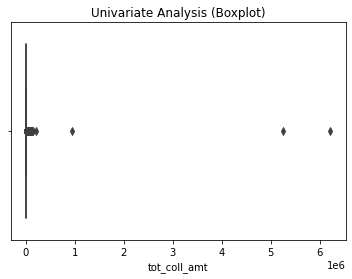

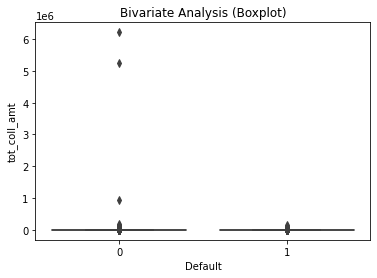






====================================== tot_cur_bal ======================================


5 Point Summary
--------------------
count    1.881660e+05
mean     1.473291e+05
std      1.660925e+05
min      0.000000e+00
25%      2.881200e+04
50%      8.249550e+04
75%      2.218492e+05
max      4.535114e+06
Name: tot_cur_bal, dtype: float64

Number of Inliers  : 0
Number of Outliers : 6434

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to tot_cur_bal


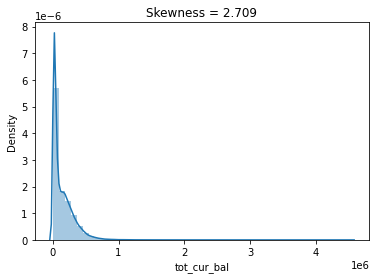

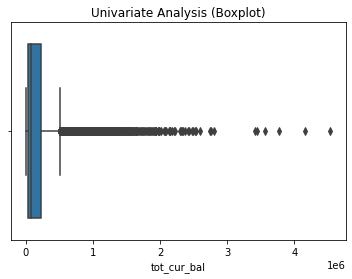

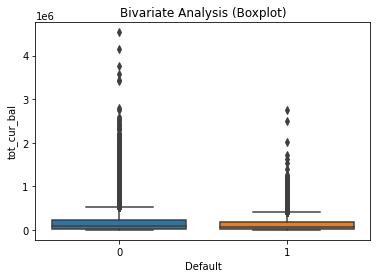






====================================== open_acc_6m ======================================


5 Point Summary
--------------------
count    188166.000000
mean          1.038466
std           1.199335
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          16.000000
Name: open_acc_6m, dtype: float64

Number of Inliers  : 0
Number of Outliers : 1160

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to open_acc_6m


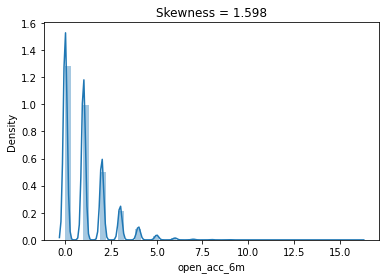

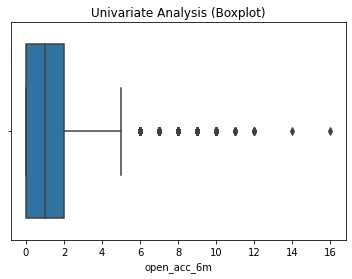

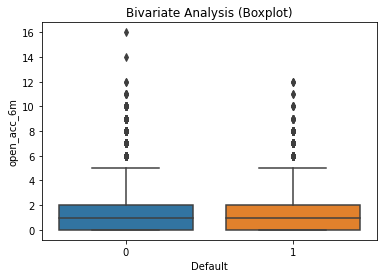






====================================== open_act_il ======================================


5 Point Summary
--------------------
count    188166.000000
mean          2.751076
std           2.955164
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          57.000000
Name: open_act_il, dtype: float64

Number of Inliers  : 0
Number of Outliers : 14899

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.94561
Statistical Analysis (p-value) by using Anova test : 0.94561
Default is not related to open_act_il


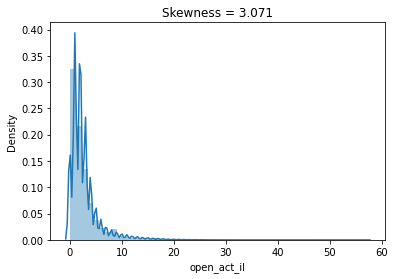

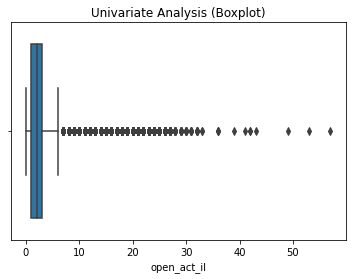

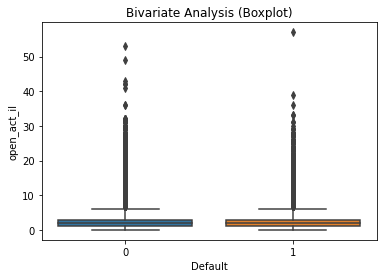






====================================== open_il_12m ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.771755
std           0.963085
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: open_il_12m, dtype: float64

Number of Inliers  : 0
Number of Outliers : 10580

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.08112
Statistical Analysis (p-value) by using Anova test : 0.08112
Default is not related to open_il_12m


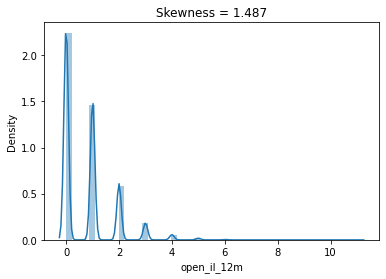

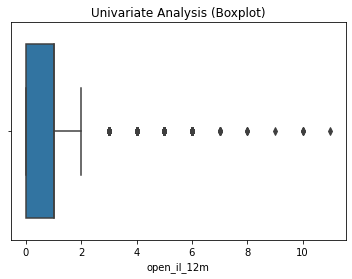

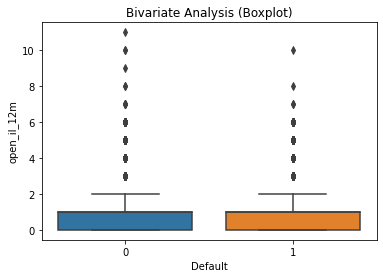






====================================== open_il_24m ======================================


5 Point Summary
--------------------
count    188166.000000
mean          1.784701
std           1.649724
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          23.000000
Name: open_il_24m, dtype: float64

Number of Inliers  : 0
Number of Outliers : 3178

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.00546
Statistical Analysis (p-value) by using Anova test : 0.00546
Default is related to open_il_24m


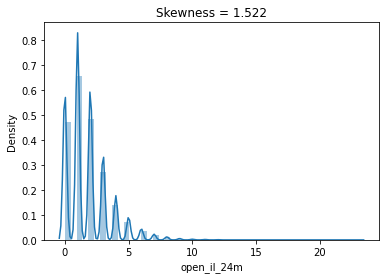

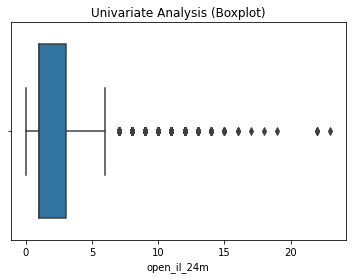

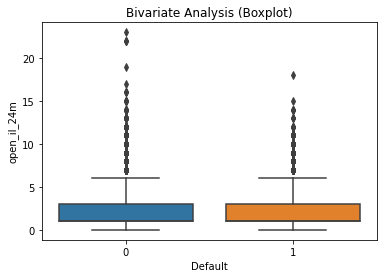






====================================== total_bal_il ======================================


5 Point Summary
--------------------
count    1.881660e+05
mean     3.589222e+04
std      4.422906e+04
min      0.000000e+00
25%      9.214000e+03
50%      2.363800e+04
75%      4.639375e+04
max      1.711009e+06
Name: total_bal_il, dtype: float64

Number of Inliers  : 0
Number of Outliers : 11871

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to total_bal_il


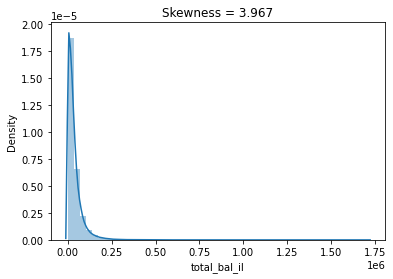

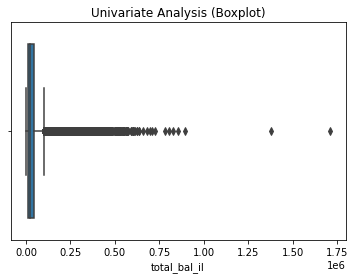

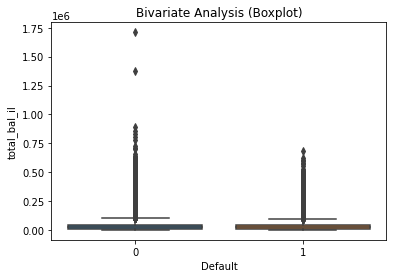






====================================== il_util ======================================


5 Point Summary
--------------------
count    161944.000000
mean         70.795232
std          23.315579
min           0.000000
25%          57.000000
50%          74.000000
75%          87.000000
max         464.000000
Name: il_util, dtype: float64

Number of Inliers  : 2745
Number of Outliers : 689

Number of Missing Values : 26222
Percent of Missing Values : 13.935567530797274

Statistical Analysis (p-value) by using Two Sample ttest : nan
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to il_util


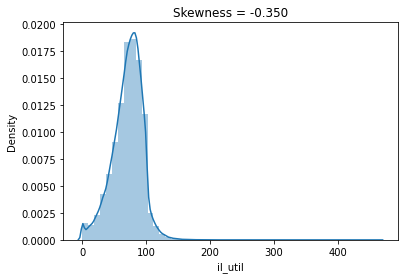

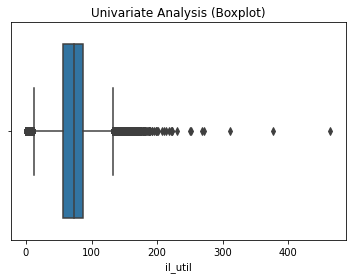

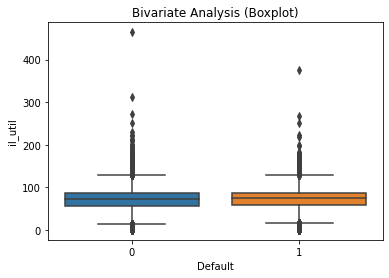






====================================== open_rv_12m ======================================


5 Point Summary
--------------------
count    188166.000000
mean          1.423924
std           1.595456
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          28.000000
Name: open_rv_12m, dtype: float64

Number of Inliers  : 0
Number of Outliers : 4597

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to open_rv_12m


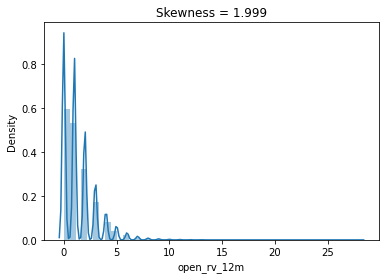

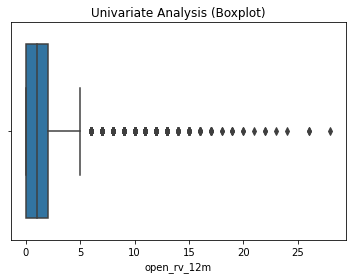

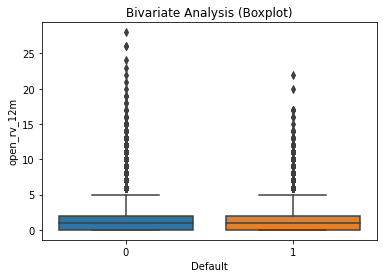






====================================== open_rv_24m ======================================


5 Point Summary
--------------------
count    188166.000000
mean          3.012096
std           2.748243
min           0.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          45.000000
Name: open_rv_24m, dtype: float64

Number of Inliers  : 0
Number of Outliers : 8240

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to open_rv_24m


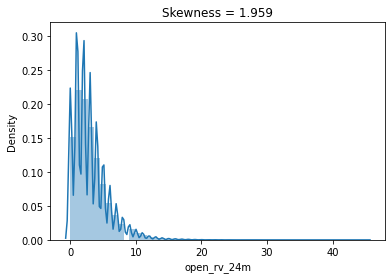

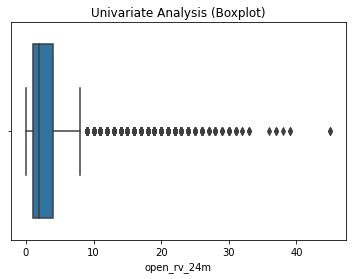

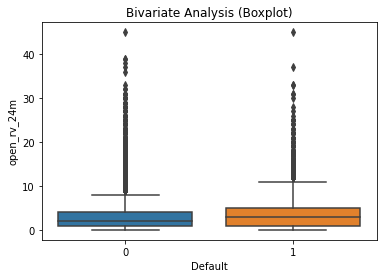






====================================== max_bal_bc ======================================


5 Point Summary
--------------------
count    188166.000000
mean       5424.040863
std        5385.922721
min           0.000000
25%        2061.000000
50%        4128.000000
75%        7107.000000
max      389468.000000
Name: max_bal_bc, dtype: float64

Number of Inliers  : 0
Number of Outliers : 10480

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to max_bal_bc


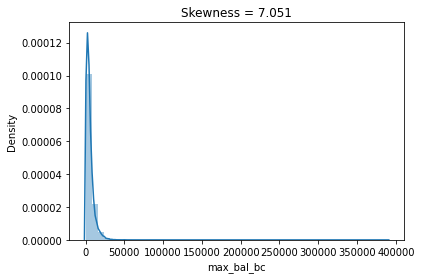

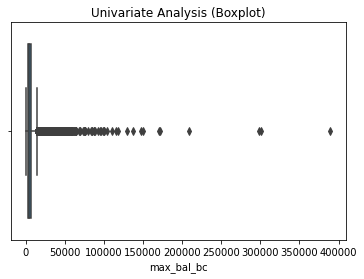

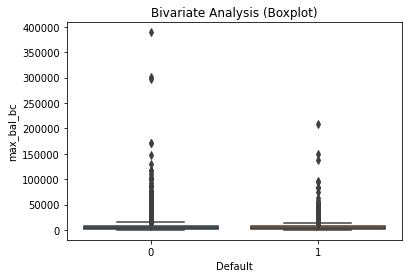

In [68]:
for i in df_p.columns[:-1]:
    analysis(df_p,i,'Default')

#####  
# INFERENCES :
# ________________________________________

# acc_now_delinq 

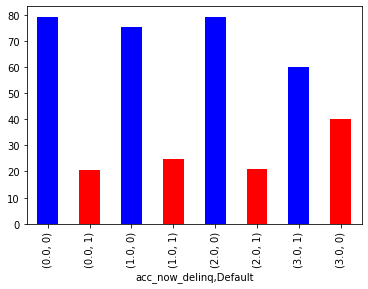

In [69]:
(df5.groupby('acc_now_delinq')['Default'].value_counts(normalize = True)*100).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

## Inference:

* column contains information on the number of accounts on which the borrower is currently delinquent. 

### No inference can be drawn from the plot as there is no clear visible pattern.

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is a good predictor for our target and should be kept for modelling.

---------------------

## tot_coll_amt :

In [70]:
data.groupby('Default')['tot_coll_amt'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,311.615828,21270.913185,0.0,0.0,0.0,0.0,6214661.0
1,38970.0,252.863023,1791.467090,0.0,0.0,0.0,0.0,146917.0


**UNIVARIATE ANALYSIS:**
* the column has 70 percent values as 0.


**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is **not a good predictor** for our target.

### No inference can be drawn from the plot and statistical summary.

-----------------------

In [71]:
data.groupby('Default')['total_bal_il'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,36168.823467,44761.187350,0.0,9238.0,23734.0,46785.5,1711009.0
1,38970.0,34833.259456,42113.503914,0.0,9114.0,23295.5,44800.5,679173.0


##  total_bal_il :

* Definition: It represents the total current balance of all installment accounts at the time of loan origination. 

### Business Understanding:
* A high value for total_bal_il may indicate that the borrower has a strong credit history, as they have been approved for multiple installment accounts and are currently managing them well. 
* On the other hand, a low value for total_bal_il may indicate that the borrower has limited credit history, which could make them a higher risk borrower.

#### But no such trend can be inferred from the plot and statistical summary.

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is a good predictor for our target and should be kept for modelling.

------------------------------

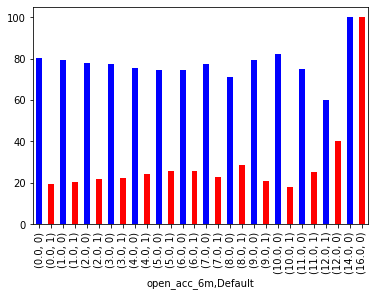

In [72]:
(df5.groupby('open_acc_6m')['Default'].value_counts(normalize = True)*100).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

##  open_acc_6m :

* Definition: represents the number of open trades (revolving accounts) in the past 6 months at the time of loan origination.

### Business Understanding:
* A high value for open_acc_6m may indicate that the borrower has been recently approved for multiple revolving accounts, which could be an indication of a strong credit history. 
* On the other hand, a low value for open_acc_6m may indicate that the borrower has limited recent credit history, which could make them a higher risk borrower.

### No clear trend is visible from the plot.

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is a very good predictor for our target and should be 
  kept for modelling.

--------------------------

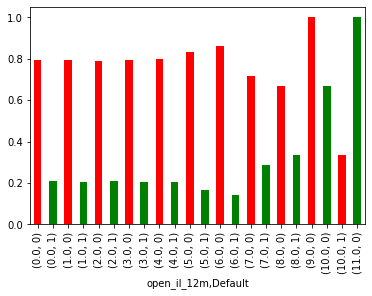

In [73]:
df5.groupby('open_il_12m')['Default'].value_counts(normalize=True).plot(kind='bar',color=['red','green'])
plt.show()

# open_il_12m

* Definition: represents the number of installment accounts opened in the past 12 months at the time of loan origination.

### Business Understanding: 
* A high value for open_il_12m may indicate that the borrower has been recently approved for multiple installment accounts, which could be an indication of a strong credit history. 
* On the other hand, a low value for open_il_12m may indicate that the borrower has limited recent installment credit history, which could make them a higher risk borrower.

### There is no clear pattern visible from the plots.

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is not a good predictor for our target and should not be kept for modelling.

-----------------------

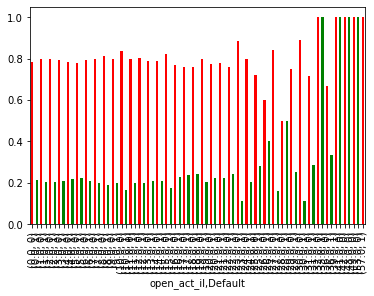

In [74]:
df5.groupby('open_act_il')['Default'].value_counts(normalize=True).plot(kind='bar',color=['red','green'])
plt.show()

##  open_act_il :

* Definition: represents the number of currently active installment trades at the time of loan origination.

#### Business Understanding: 
* A high value for open_act_il may indicate that the borrower has been able to maintain multiple active installment trades, which could be an indication of a strong credit history. 
* On the other hand, a low value for open_act_il may indicate that the borrower has limited current installment credit history, which could make them a higher risk borrower

### No clear pattern is visible from the plot.

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is not a good predictor for our target and should not be kept for modelling.

------------------------------

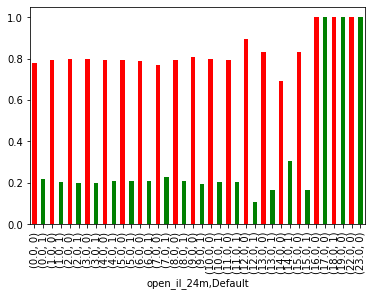

In [75]:
df5.groupby('open_il_24m')['Default'].value_counts(normalize=True).plot(kind='bar',color=['red','green'])
plt.show()

##  open_il_24m :


* Definition: It represents the number of installment accounts opened in the past 24 months at the time of loan origination. 

### Business Understanding:
* A high value for open_il_24m may indicate that the borrower has been recently approved for multiple installment accounts, which could be an indication of a strong credit history. 
* On the other hand, a low value for open_il_24m may indicate that the borrower has limited recent installment credit history, which could make them a higher risk borrower.

### No inference can be made from the plots.

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is a good predictor for our target and should be kept for modelling.

---------------------------

In [76]:
data.groupby('Default')['total_bal_il'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,36168.823467,44761.187350,0.0,9238.0,23734.0,46785.5,1711009.0
1,38970.0,34833.259456,42113.503914,0.0,9114.0,23295.5,44800.5,679173.0


##  total_bal_il :

* Definition: It represents the total current balance of all installment accounts at the time of loan origination.

### Business Understanding:
* A high value for total_bal_il may indicate that the borrower has multiple active installment accounts with a significant total balance, which could be an indication of a strong credit history and financial stability. 
* On the other hand, a low value for total_bal_il may indicate that the borrower has limited current installment credit history or lower financial stability, which could make them a higher risk borrower

### Not much can be inferred from the plot and statistical summary.

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is a good predictor for our target and should be kept for modelling.

-----------------------------

In [77]:
data.groupby('Default')['il_util'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,128253.0,70.495638,23.253782,0.0,57.0,73.0,86.0,464.0
1,33691.0,71.935710,23.514789,0.0,59.0,75.0,87.0,376.0


##  il_util :

* Definition: It represents the ratio of total current balance to high credit/credit limit on all install accounts.

### Business Understanding:
* A low value for il_util may indicate that the borrower has a lower utilization rate of their installment accounts, which could be an indication of a strong credit history and financial stability.
* On the other hand, a high value for il_util may indicate that the borrower has a higher utilization rate on their installment accounts, which could make them a higher risk borrower.

### We are not able find any clear visible pattern or trend .

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is a good predictor for our target and should be kept for modelling.

--------------------------------

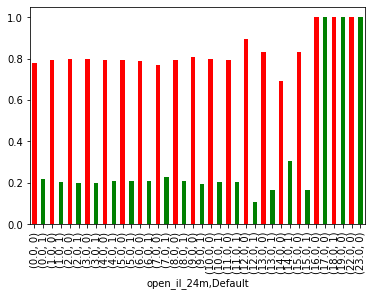

In [78]:
df5.groupby('open_il_24m')['Default'].value_counts(normalize=True).plot(kind='bar',color=['red','green'])
plt.show()

##  open_rv_12m :

* Defination : The open_rv_12m variable could provide important information about the borrower's recent credit behavior and their ability to manage their credit responsibly.

### Business Understanding:
* A high value for open_rv_12m may indicate that the borrower has opened multiple new revolving credit accounts in the past year, which could be an indication of increased credit utilization and possibly higher credit risk.
* On the other hand, a low value for open_rv_12m may indicate that the borrower has not opened any new revolving credit accounts in the past year, which could be an indication of lower credit utilization and possibly lower credit risk.

#### We are not able find any clear visible pattern or trend .

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is a very good predictor for our target and should be kept for modelling.

-------------------------

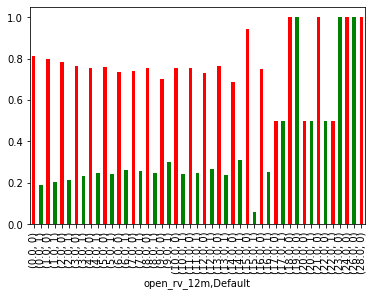

In [79]:
data.groupby('open_rv_12m')['Default'].value_counts(normalize=True).plot(kind='bar',color=['red','green'])
plt.show()

##  open_rv_24m :

* Definition: It represents the number of revolving trades opened in the past 12 months by the borrower.

### Business Understanding:
* A high value for open_rv_12m may indicate that the borrower has opened multiple new revolving credit accounts in the past year, which could be an indication of increased credit utilization and possibly higher credit risk. 
* On the other hand, a low value for open_rv_12m may indicate that the borrower has not opened any new revolving credit accounts in the past year

### We can see the trend upto certain values (after that the pattern will not follow).

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is a very good predictor for our target and should be kept for modelling.

--------------------------------

In [80]:
data.groupby('Default')['max_bal_bc'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,5459.662880,5459.187396,0.0,2054.75,4141.0,7165.00,389468.0
1,38970.0,5287.662561,5093.468315,0.0,2088.25,4082.0,6929.75,208872.0


##  max_bal_bc :

* Definition: It represents the maximum current balance owed on all revolving bankcard accounts for the borrower

### Business Understanding:
* A high value for max_bal_bc may indicate that the borrower has a large amount of outstanding credit card debt, which could be an indication of increased credit utilization and possibly higher credit risk. 
* On the other hand, a low value for max_bal_bc may indicate that the borrower has a lower amount of outstanding credit card debt, which could be an indication of lower credit utilization and possibly lower credit risk.

### No clear pattern is visible from the plot

**STATISTICAL ANALYSIS:**
* According to the Statistical Analysis we can say that the column is a good predictor for our target and should be 
  kept for modelling.

--------------------------------------------------

# --------------------------------------------

====================================== total_rev_hi_lim ======================================


5 Point Summary
--------------------
count    1.881660e+05
mean     3.566773e+04
std      3.535990e+04
min      0.000000e+00
25%      1.520000e+04
50%      2.640000e+04
75%      4.460000e+04
max      1.649101e+06
Name: total_rev_hi_lim, dtype: float64

Number of Inliers  : 0
Number of Outliers : 10971

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to total_rev_hi_lim


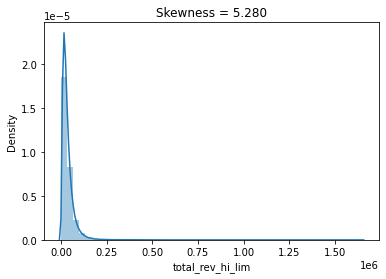

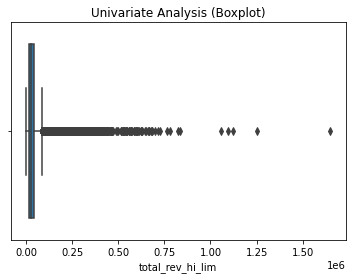

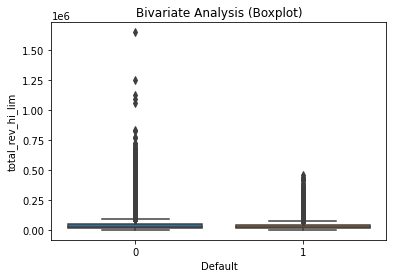

In [81]:
analysis(df5,'total_rev_hi_lim','Default')

In [82]:
df5.groupby('Default')['total_rev_hi_lim'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,36817.145855,36755.979175,0.0,15600.0,27100.0,46100.0,1649101.0
1,38970.0,31267.192327,28990.940609,0.0,13800.0,23900.0,39300.0,459700.0


# Inferences: total_rev_hi_lim

- Definition: "total_rev_hi_lim" is a variable in the Lending Club dataset that represents the total revolving credit limit of the borrower at the time the loan was issued. 

### Business understanding:
Revolving credit is a type of credit that allows a borrower to borrow up to a certain limit, repay the borrowed amount, and then borrow again, as long as the borrower continues to make payments on time.
- There is no clear trend visible from the plot and statistical summary.

====================================== inq_fi ======================================


5 Point Summary
--------------------
count    188166.000000
mean          1.184858
std           1.621763
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: inq_fi, dtype: float64

Number of Inliers  : 0
Number of Outliers : 4603

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to inq_fi


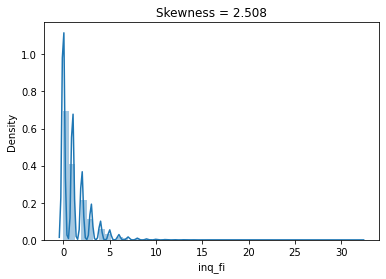

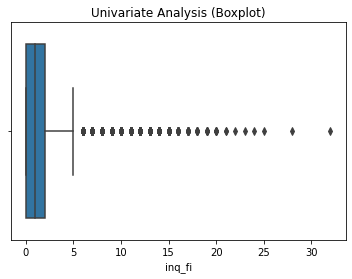

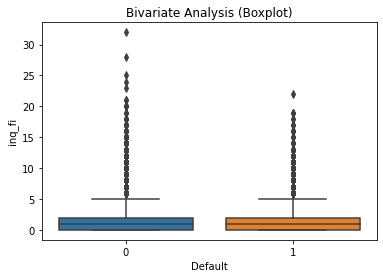

In [83]:
analysis(df5,'inq_fi','Default')

In [84]:
# df5.groupby('inq_fi')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b','r'])

# Inferences: 'inq_fi'
- Definition:It represents the number of inquiries made by financial institutions on the borrower's credit history in the past six months.

- No clear trend is visible from the plot.

====================================== total_cu_tl ======================================


5 Point Summary
--------------------
count    188166.000000
mean          1.624236
std           2.820833
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          68.000000
Name: total_cu_tl, dtype: float64

Number of Inliers  : 0
Number of Outliers : 15677

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to total_cu_tl


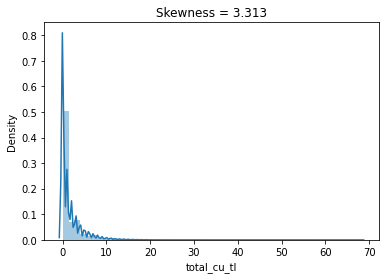

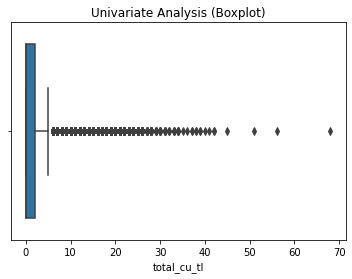

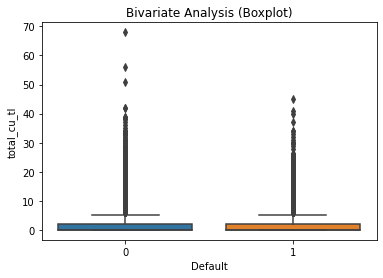

In [85]:
analysis(df5,'total_cu_tl','Default')

<AxesSubplot: xlabel='total_cu_tl,Default'>

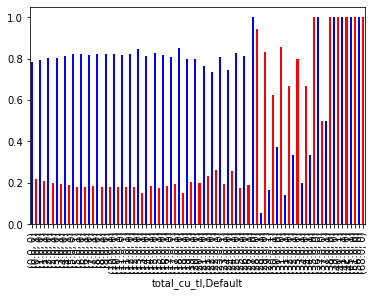

In [86]:
df5.groupby('total_cu_tl')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b','r'])

# Inferences:'total_cu_tl'
- Defintion: It stands for "total credit union trades and lines" and represents the total number of credit accounts that a borrower has with credit unions.
### Business understanding 
- A higher total_cu_tl score may suggest a lower risk of default, as it could indicate that the borrower has a diverse credit history and has demonstrated an ability to manage multiple lines of credit responsibly.
- No clear visible trend found through data.

====================================== inq_last_12m ======================================


5 Point Summary
--------------------
count    188166.000000
mean          2.342905
std           2.536858
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          67.000000
Name: inq_last_12m, dtype: float64

Number of Inliers  : 0
Number of Outliers : 11979

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to inq_last_12m


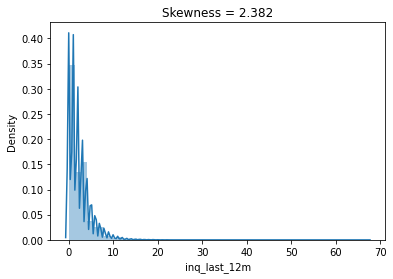

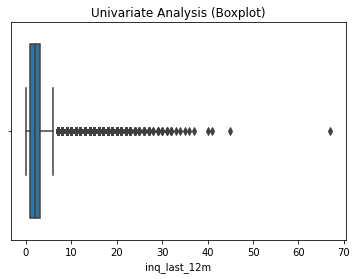

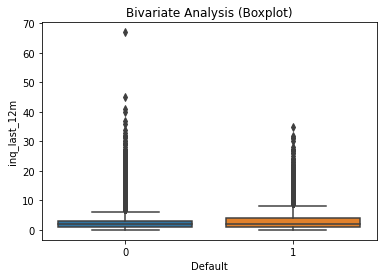

In [87]:
analysis(df5,'inq_last_12m','Default')

<AxesSubplot: xlabel='inq_last_12m,Default'>

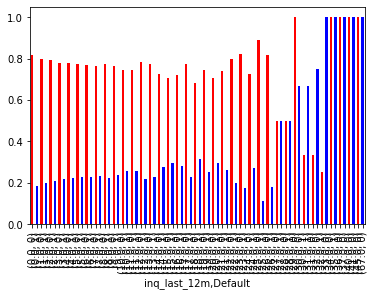

In [88]:
df5.groupby('inq_last_12m')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['r', 'b'])

# Inferences: inq_last_12m'
- Defintion: It represents the number of credit inquiries that a borrower has had in the last 12 months.
### Business understanding
- A higher inq_last_12m score may suggest a higher risk of default, as it could indicate that the borrower has recently applied for many new lines of credit or loans.

- The above trend can be visible only for smaller value (as not enough smaples/ data is available for larger values of inq_last_12m), though it is not the only factor impacting Default status.   

====================================== acc_open_past_24mths ======================================


5 Point Summary
--------------------
count    188166.000000
mean          5.117062
std           3.424348
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          46.000000
Name: acc_open_past_24mths, dtype: float64

Number of Inliers  : 0
Number of Outliers : 4561

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to acc_open_past_24mths


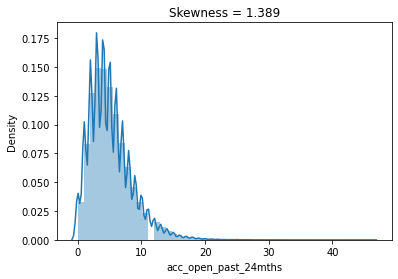

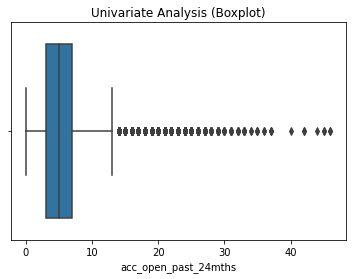

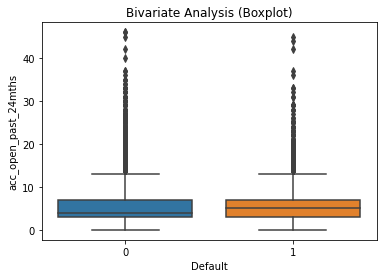

In [89]:
analysis(df5,'acc_open_past_24mths','Default')

<AxesSubplot: xlabel='acc_open_past_24mths,Default'>

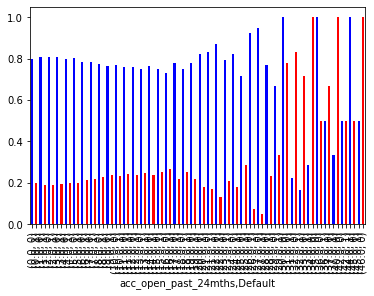

In [90]:
df5.groupby('acc_open_past_24mths')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b', 'r'])

# Inferences: acc_open_past_24mths
- Definition: It represents the number of accounts that a borrower has opened in the past 24 months, including both credit and loan accounts.
### Business understanding
- A higher acc_open_past_24mths score may suggest a higher risk of default, as it could indicate that the borrower has recently taken on a significant amount of new debt or has a history of opening many new credit accounts.
- No clear pattern is visible from the plot.

====================================== avg_cur_bal ======================================


5 Point Summary
--------------------
count    188159.000000
mean      14083.285110
std       17191.265771
min           0.000000
25%        3051.000000
50%        7628.000000
75%       19549.000000
max      445856.000000
Name: avg_cur_bal, dtype: float64

Number of Inliers  : 0
Number of Outliers : 10171

Number of Missing Values : 7
Percent of Missing Values : 0.003720119468979518

Statistical Analysis (p-value) by using Two Sample ttest : nan
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to avg_cur_bal


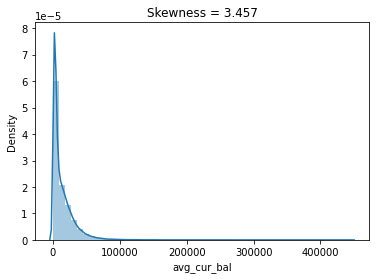

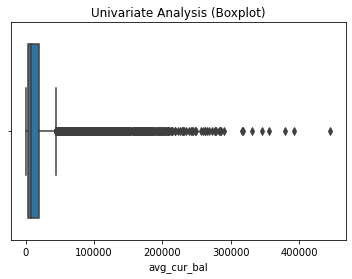

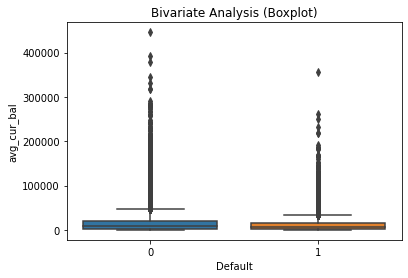

In [91]:
analysis(df5,'avg_cur_bal','Default')

In [92]:
df5.groupby('Default')['avg_cur_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149191.0,14832.292833,17778.293640,0.0,3172.0,8435.0,20728.00,445856.0
1,38968.0,11215.670371,14372.941715,0.0,2712.0,5565.5,14873.25,355824.0


# Inference: 'avg_cur_bal'
- It stands for "average current balance" and represents the average balance across all of a borrower's open credit accounts.
### Business understanding 
- A higher avg_cur_bal score indicates that the borrower has a lower amount of outstanding debt, which can suggest a lower risk of default. 
- The above trend can be seen through statstical summary, as defaulters have lower mean and median values compared to non-defaulters. Though this is not the only factor on which Default depends on.

====================================== bc_open_to_buy ======================================


5 Point Summary
--------------------
count    185747.000000
mean      13734.157273
std       18553.615920
min           0.000000
25%        2516.000000
50%        7250.000000
75%       17518.000000
max      331957.000000
Name: bc_open_to_buy, dtype: float64

Number of Inliers  : 0
Number of Outliers : 14124

Number of Missing Values : 2419
Percent of Missing Values : 1.2855669993516363

Statistical Analysis (p-value) by using Two Sample ttest : nan
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to bc_open_to_buy


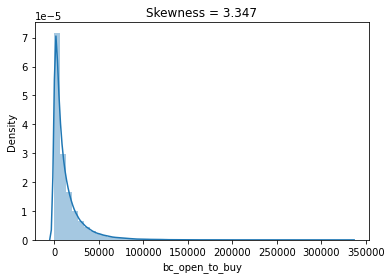

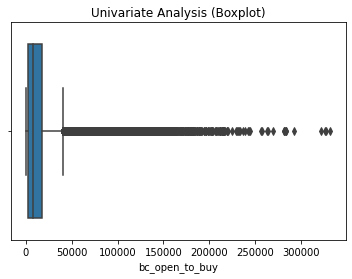

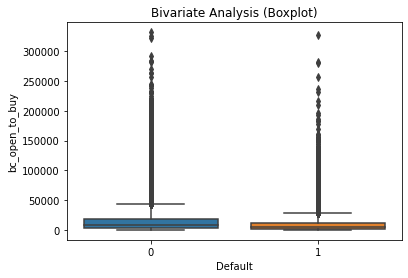

In [93]:
analysis(df5,'bc_open_to_buy','Default')

In [94]:
df5.groupby('Default')['bc_open_to_buy'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,147278.0,14685.950352,19306.948416,0.0,2787.0,7978.5,18943.75,331957.0
1,38469.0,10090.231485,14775.050624,0.0,1808.0,5073.0,12402.00,327512.0


# Inferences: 'bc_open_to_buy'
- Definition: It represents the amount of credit available to a borrower on their credit card accounts.
### Business understanding 
    - A high bc_open_to_buy score indicates that the borrower has a significant amount of available credit, which can suggest a lower risk of default. 
- The above trend can be seen through statstical summary, as defaulters have lower mean and median values compared to non-defaulters. Though this is not the only factor on which Default depends on.

====================================== bc_util ======================================


5 Point Summary
--------------------
count    185637.000000
mean         50.554324
std          29.557301
min           0.000000
25%          25.900000
50%          49.900000
75%          76.000000
max         184.400000
Name: bc_util, dtype: float64

Number of Inliers  : 0
Number of Outliers : 3

Number of Missing Values : 2529
Percent of Missing Values : 1.3440260195784572

Statistical Analysis (p-value) by using Two Sample ttest : nan
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to bc_util


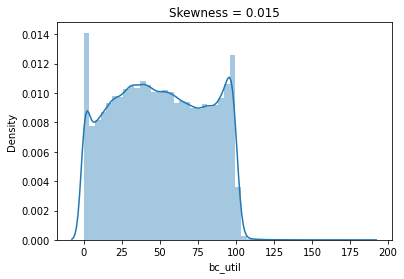

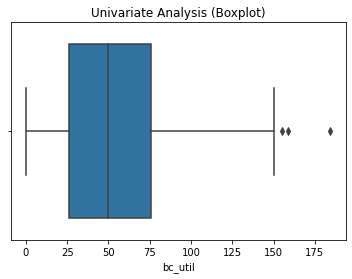

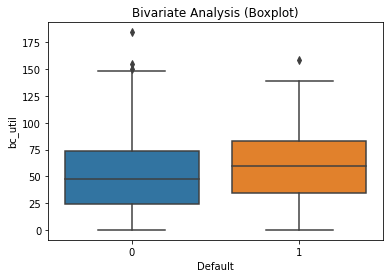

In [95]:
analysis(df5,'bc_util','Default')

In [96]:
df5.groupby('Default')['bc_util'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,147192.0,48.813106,29.463841,0.0,24.0,47.3,73.8,184.4
1,38445.0,57.220817,28.960752,0.0,34.6,59.3,82.7,158.6


# Inferences: 'bc_util'
- Definition: It stands for "balance-to-limit ratio on bankcard accounts," and represents the amount of credit card debt a borrower has compared to their credit card limits.
### Business understanding 
    - A high bc_util score indicates that the borrower is using a significant portion of their available credit, which can suggest a higher risk of default.
- From the analysis we can infer that the the default customers (mean/ median) having higher 'balance to limit ratio on bankcard account' compared to non-defaulters, but this is not the only factor Default status depend on 

====================================== chargeoff_within_12_mths ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.009773
std           0.117346
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: chargeoff_within_12_mths, dtype: float64

Number of Inliers  : 0
Number of Outliers : 1628

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.07181
Statistical Analysis (p-value) by using Anova test : 0.07181
Default is not related to chargeoff_within_12_mths


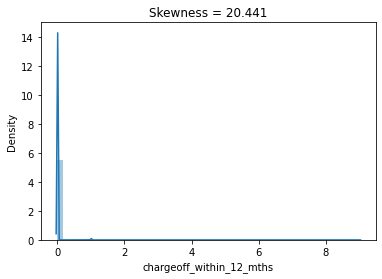

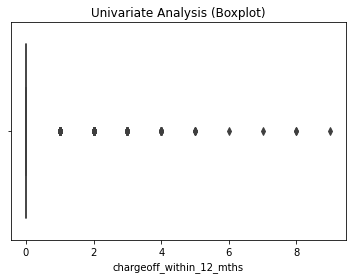

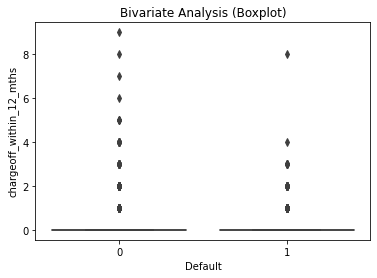

In [97]:
analysis(df5,'chargeoff_within_12_mths','Default')

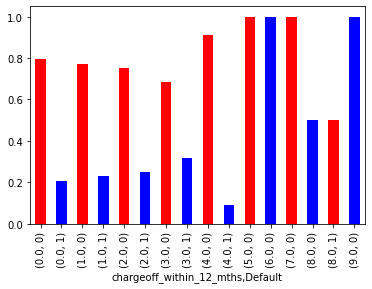

In [98]:
df5.groupby('chargeoff_within_12_mths')['Default'].value_counts(normalize = True)\
.plot(kind = 'bar', color = ['r', 'b'])
plt.show()

# Inference: 'chargeoff_within_12_mths'
- Definition: It represents the number of loans or credit accounts that a borrower has had charged off within the last 12 months. Chargeoffs are a negative mark on a borrower's credit report and can have a significant impact on their credit score and creditworthiness.
### Business understanding 
- Borrowers who have a higher number of chargeoffs within the last 12 months are considered to be a higher risk for default, as it suggests that they have a history of not repaying their debts.
- The above trend can be visible only for smaller value (as not enough smaples/ data is available for larger values of chargeoffs), though it is not the only factor impacting Default status.  

#### Statistical Tests
* the particular column or feature is not related to the target variable as the pvalue after statistical test is > 0.05

====================================== delinq_amnt ======================================


5 Point Summary
--------------------
count    188166.000000
mean         15.734065
std         962.792988
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      249925.000000
Name: delinq_amnt, dtype: float64

Number of Inliers  : 0
Number of Outliers : 586

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.00657
Statistical Analysis (p-value) by using Anova test : 0.00657
Default is related to delinq_amnt


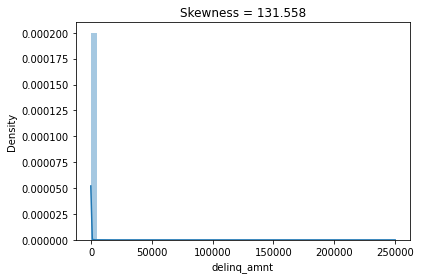

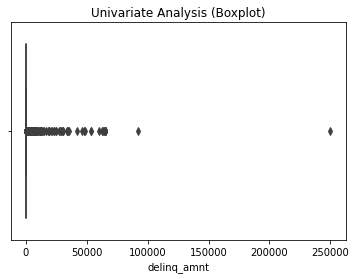

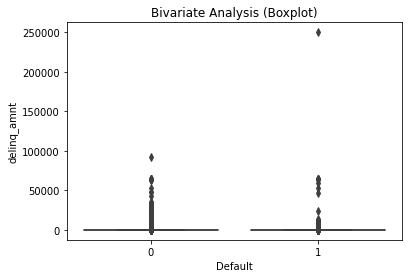

In [99]:
analysis(df5,'delinq_amnt','Default')

In [100]:
df5.groupby('Default')['delinq_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,12.651043,713.623060,0.0,0.0,0.0,0.0,92051.0
1,38970.0,27.537362,1589.356472,0.0,0.0,0.0,0.0,249925.0


In [101]:
df5[df5.delinq_amnt>0].groupby('Default')['delinq_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,432.0,4369.178241,12538.187461,2.0,65.75,318.0,1772.50,92051.0
1,154.0,6968.383117,24386.506696,1.0,70.50,646.0,3145.25,249925.0


# Inferences: 'delinq_amnt'
- It represents the total amount of past due payments on a borrower's credit accounts.
### Business understanding
- Borrowers who have a higher delinq_amnt are considered to be a higher risk for default, as it suggests that they have a history of missed or late payments on their credit accounts.
- Our data is highly skewed as most of the borrowes have delinq_amnt equal to 0. But if the value of delinq_amnt is not zero, we can see that the mean of the delinq_amnt is higher Defaulter than the non-defaulters. But this is not the only factor for Default.

====================================== mo_sin_old_il_acct ======================================


5 Point Summary
--------------------
count    183120.000000
mean        123.216159
std          53.972957
min           0.000000
25%          90.000000
50%         129.000000
75%         152.000000
max         999.000000
Name: mo_sin_old_il_acct, dtype: float64

Number of Inliers  : 0
Number of Outliers : 4094

Number of Missing Values : 5046
Percent of Missing Values : 2.681674691495807

Statistical Analysis (p-value) by using Two Sample ttest : nan
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to mo_sin_old_il_acct


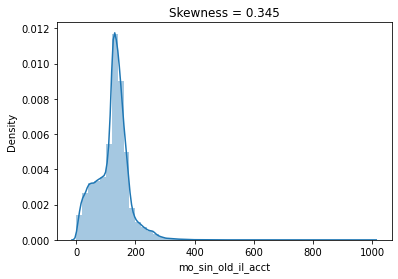

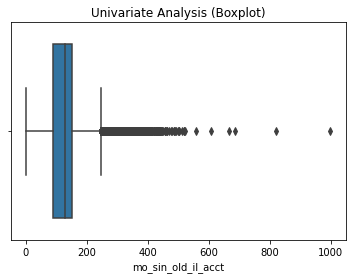

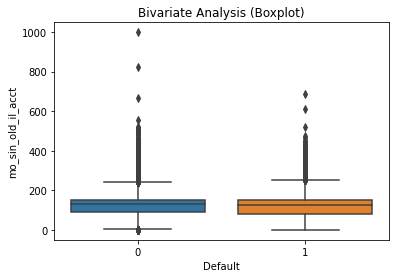

In [102]:
analysis(df5,'mo_sin_old_il_acct','Default')

In [103]:
# df5.groupby('mo_sin_old_il_acct')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['r', 'b'])

# Inferences: 'mo_sin_old_il_acct'
- Definition: It stands for "months since oldest installment account opened." This metric represents the length of time since the borrower's oldest installment credit account was opened.
### Business understanding
- Borrowers who have a longer credit history with installment credit accounts are often viewed as a lower risk.
- No clear trend is visible from the plot.

====================================== mo_sin_old_rev_tl_op ======================================


5 Point Summary
--------------------
count    188166.000000
mean        175.886919
std          96.277605
min           2.000000
25%         114.000000
50%         158.000000
75%         225.000000
max         806.000000
Name: mo_sin_old_rev_tl_op, dtype: float64

Number of Inliers  : 0
Number of Outliers : 6025

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to mo_sin_old_rev_tl_op


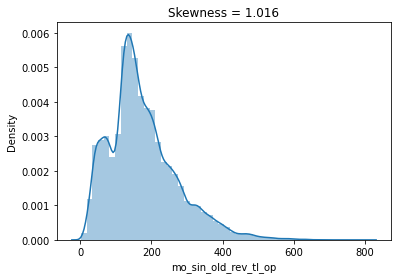

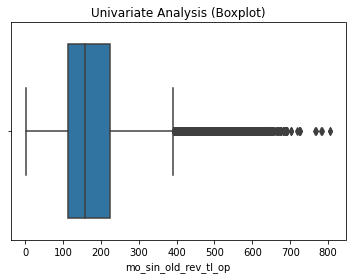

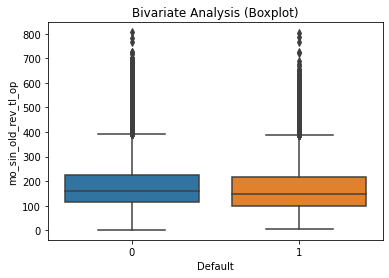

In [104]:
analysis(df5,'mo_sin_old_rev_tl_op','Default')

<AxesSubplot: xlabel='mo_sin_old_rev_tl_op,Default'>

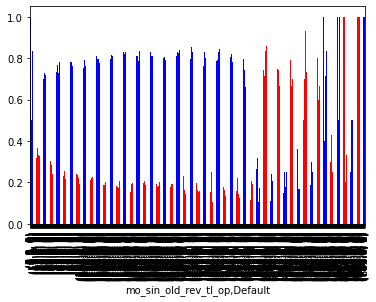

In [105]:
df5.groupby('mo_sin_old_rev_tl_op')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['r', 'b'])

# Inference: 'mo_sin_old_rev_tl_op'
- It stands for "months since oldest revolving account opened." This metric represents the length of time since the borrower's oldest revolving credit account was opened.
### Business understanding
- A longer credit history with revolving credit accounts can indicate a more established credit profile and a history of responsible credit use.
- This trend is visible in the data but only for the initial values (as we have not enough sample for higher values of 'mo_sin_rcnt_tl') 

====================================== mo_sin_rcnt_rev_tl_op ======================================


5 Point Summary
--------------------
count    188166.000000
mean         12.936205
std          16.111862
min           0.000000
25%           4.000000
50%           8.000000
75%          16.000000
max         343.000000
Name: mo_sin_rcnt_rev_tl_op, dtype: float64

Number of Inliers  : 0
Number of Outliers : 13686

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to mo_sin_rcnt_rev_tl_op


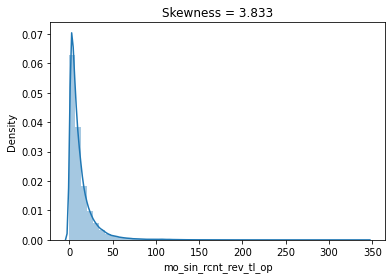

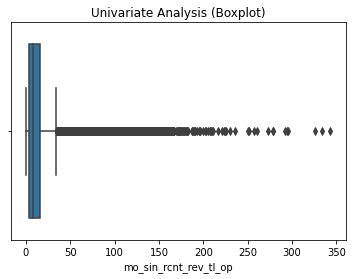

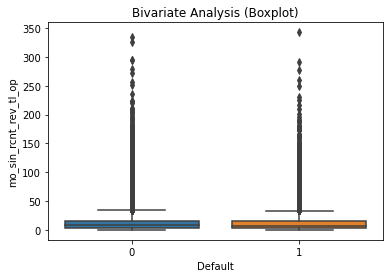

In [106]:
analysis(df5,'mo_sin_rcnt_rev_tl_op','Default')

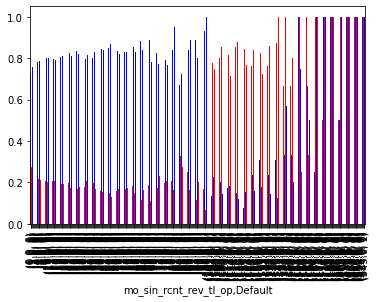

In [107]:
df5.groupby('mo_sin_rcnt_rev_tl_op')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

# Inference: 'mo_sin_rcnt_rev_tl_op'
- It stands for "months since recent revolving account opened." This metric represents the length of time since the most recent revolving credit account was opened by the borrower.
### Business understanding
- Borrowers who have recently opened new revolving credit accounts are often viewed as a higher risk.
- No clear trend is visible from the plot.

# -----------------------------------

====================================== mo_sin_rcnt_tl ======================================


5 Point Summary
--------------------
count    188166.000000
mean          7.406317
std           7.782274
min           0.000000
25%           3.000000
50%           5.000000
75%          10.000000
max         260.000000
Name: mo_sin_rcnt_tl, dtype: float64

Number of Inliers  : 0
Number of Outliers : 9375

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to mo_sin_rcnt_tl


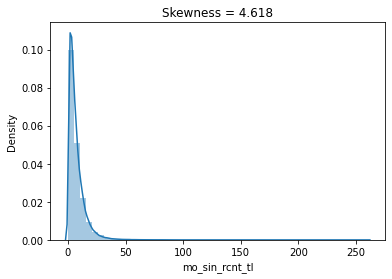

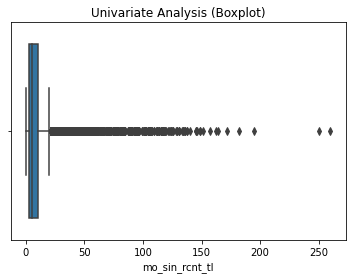

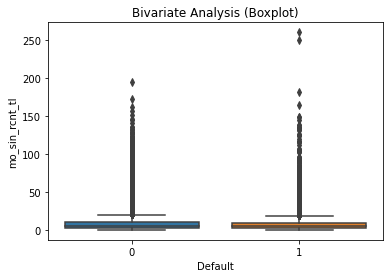

In [108]:
analysis(df5,'mo_sin_rcnt_tl','Default')

In [109]:
df5.groupby('mo_sin_rcnt_tl')['Default'].value_counts(normalize = True)

mo_sin_rcnt_tl  Default
0.0             0          0.729562
                1          0.270438
1.0             0          0.762555
                1          0.237445
2.0             0          0.787022
                             ...   
172.0           0          1.000000
182.0           1          1.000000
195.0           0          1.000000
250.0           1          1.000000
260.0           1          1.000000
Name: Default, Length: 246, dtype: float64

# Inference: mo_sin_rcnt_tl
- Definition: It stands for "months since recent account opening." This metric represents the length of time since the most recent credit account was opened by the borrower.
### Business understanding
- Borrowers who have recently opened new credit accounts are often viewed as a higher risk. 
- This trend is visible in the data but only for the initial values (as we have not enough sample for higher values of 'mo_sin_rcnt_tl') 

====================================== mort_acc ======================================


5 Point Summary
--------------------
count    188166.000000
mean          1.484631
std           1.803475
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          24.000000
Name: mort_acc, dtype: float64

Number of Inliers  : 0
Number of Outliers : 6597

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to mort_acc


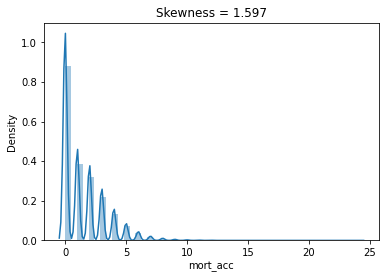

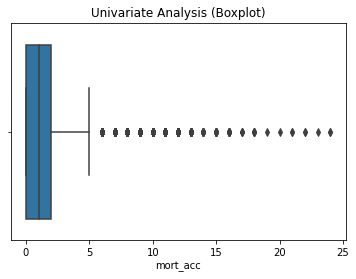

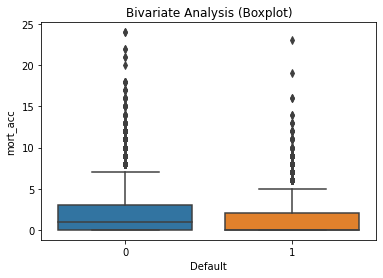

In [110]:
analysis(df5,'mort_acc',"Default")

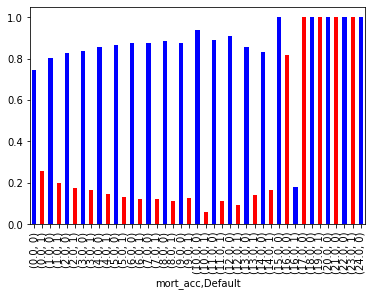

In [111]:
(df5.groupby('mort_acc')['Default'].value_counts(normalize = True)).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

# Inference:  mort_acc
- Definition: It provides information on the borrower's credit history and their ability to manage credit responsibly, particularly with regards to their mortgage payments. 
### Business undertanding
- Borrowers with a higher number of mortgage accounts may be seen as less risky by lenders and may qualify for better loan terms.
- - The above trend is visible in the data as the number of borrower's mortgage account increases, the proportion of individual might default likely to decreases, but this is not the only factor that default depends on.

====================================== num_accts_ever_120_pd ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.541809
std           1.461634
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: num_accts_ever_120_pd, dtype: float64

Number of Inliers  : 0
Number of Outliers : 44746

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.12258
Statistical Analysis (p-value) by using Anova test : 0.12258
Default is not related to num_accts_ever_120_pd


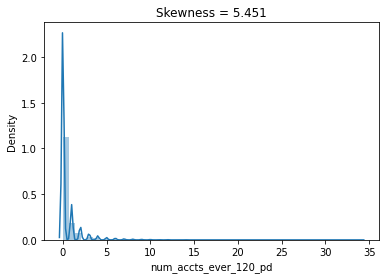

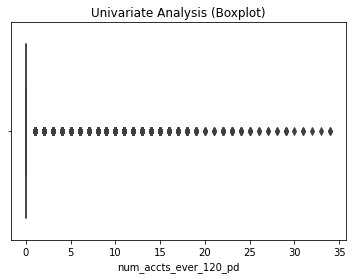

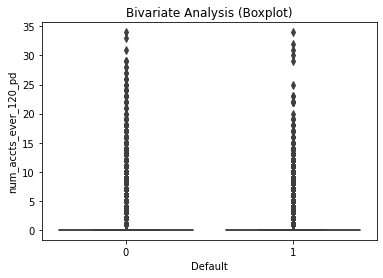

In [112]:
analysis(df5,'num_accts_ever_120_pd','Default')

In [113]:
df5.groupby('num_accts_ever_120_pd')['Default'].value_counts(normalize = True)

num_accts_ever_120_pd  Default
0.0                    0          0.795698
                       1          0.204302
1.0                    0          0.778613
                       1          0.221387
2.0                    0          0.784452
                       1          0.215548
3.0                    0          0.795749
                       1          0.204251
4.0                    0          0.778882
                       1          0.221118
5.0                    0          0.802177
                       1          0.197823
6.0                    0          0.802480
                       1          0.197520
7.0                    0          0.772321
                       1          0.227679
8.0                    0          0.809524
                       1          0.190476
9.0                    0          0.854890
                       1          0.145110
10.0                   0          0.825112
                       1          0.174888
11.0                   

# Inference: num_accts_ever_120_pd
- Definition: This variable provides information on the borrower's credit history and their ability to manage credit responsibly. 
### Business understanding
- Borrowers with a higher number of accounts that have been past due for more than 120 days may be seen as riskier by lenders and may have a harder time obtaining credit in the future.
- The above trend is visible in the data as the number of borrower's riskier account increases, the proportion of individual might default likely to increase, but this is not the only factor that default depends on.

====================================== num_actv_bc_tl ======================================


5 Point Summary
--------------------
count    188166.000000
mean          3.508461
std           2.320342
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          33.000000
Name: num_actv_bc_tl, dtype: float64

Number of Inliers  : 0
Number of Outliers : 4197

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to num_actv_bc_tl


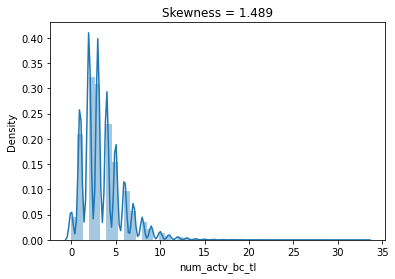

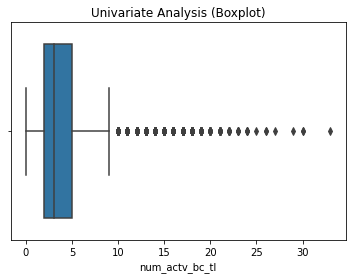

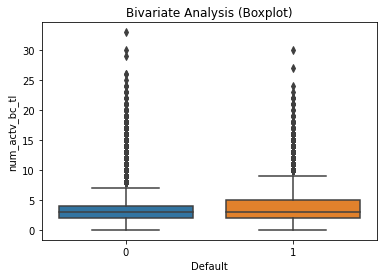

In [114]:
analysis(df5,'num_actv_bc_tl','Default')

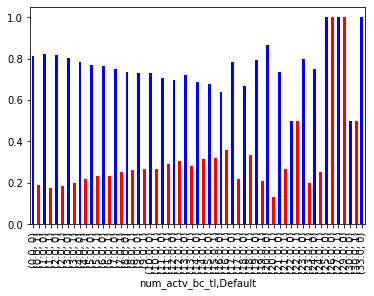

In [115]:
df5.groupby('num_actv_bc_tl')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

# Inference: num_actv_bc_tl
- Definition: It provides information on the borrower's current credit utilization and shows the number of bankcard accounts the borrower is currently managing successfully. Active bankcard accounts are those that have an outstanding balance or a balance that has been used in the past month.
### Business understanding
- Borrowers with a lower number of active bankcard accounts may be seen as less risky and may qualify for better loan terms.
- The above trend is visible in the data as the number of borrower's active bankcard account increases, the proportion of individual might default likely to increase, but this is not the only factor that default depends on.

====================================== num_actv_rev_tl ======================================


5 Point Summary
--------------------
count    188166.000000
mean          5.296823
std           3.365751
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          63.000000
Name: num_actv_rev_tl, dtype: float64

Number of Inliers  : 0
Number of Outliers : 5122

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to num_actv_rev_tl


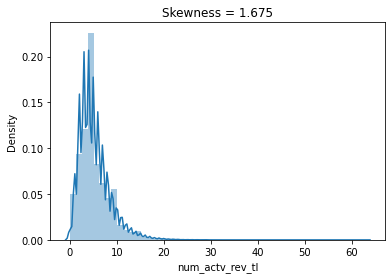

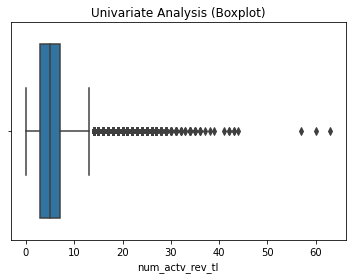

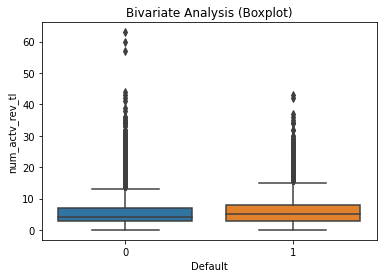

In [116]:
analysis(df5,'num_actv_rev_tl','Default')

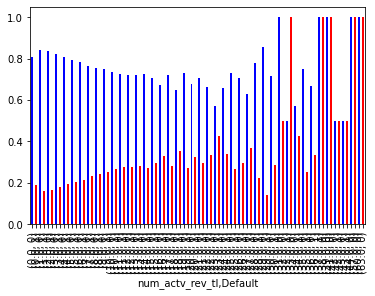

In [117]:
df5.groupby('num_actv_rev_tl')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

# Inference: num_actv_rev_tl
- Definition: It provides information on the borrower's current credit utilization and shows the number of revolving credit accounts the borrower is currently managing successfully. Revolving credit accounts include credit cards and lines of credit, where the borrower has a set credit limit and can borrow up to that limit at any time.
### Business understanding
- Borrowers with a lower number of active revolving credit accounts may be seen as less risky and may qualify for better loan terms.
- The above trend is visible in the data as the number of borrower's current credit account increases, the proportion of individual might default likely to increase, but this is not the only factor that default depends on.

====================================== num_bc_sats ======================================


5 Point Summary
--------------------
count    188166.000000
mean          4.842299
std           3.179023
min           0.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          46.000000
Name: num_bc_sats, dtype: float64

Number of Inliers  : 0
Number of Outliers : 10399

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to num_bc_sats


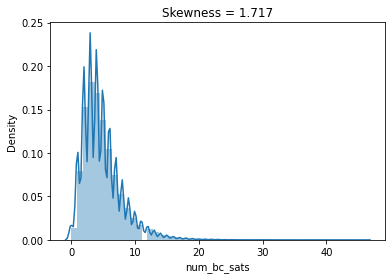

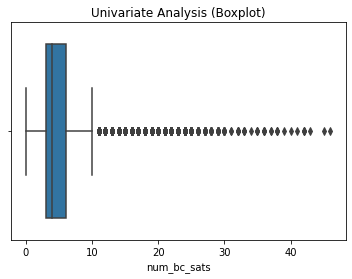

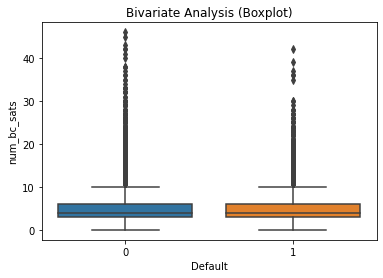

In [118]:
analysis(df5,'num_bc_sats','Default')

In [119]:
df5.groupby('num_bc_sats')['Default'].value_counts(normalize = True)

num_bc_sats  Default
0.0          0          0.793900
             1          0.206100
1.0          0          0.795076
             1          0.204924
2.0          0          0.803428
             1          0.196572
3.0          0          0.800802
             1          0.199198
4.0          0          0.796059
             1          0.203941
5.0          0          0.791929
             1          0.208071
6.0          0          0.783186
             1          0.216814
7.0          0          0.786705
             1          0.213295
8.0          0          0.785863
             1          0.214137
9.0          0          0.783991
             1          0.216009
10.0         0          0.788793
             1          0.211207
11.0         0          0.775713
             1          0.224287
12.0         0          0.763889
             1          0.236111
13.0         0          0.766534
             1          0.233466
14.0         0          0.774634
             1        

# Inference: num_bc_sats
- Definition: provides information on the borrower's current credit utilization and shows the number of bankcard accounts the borrower is currently managing successfully. 
### Business understanding
- A higher number of satisfactory bankcard accounts may indicate that the borrower has a higher amount of available credit and may be at a higher risk of default.
- The above trend is visible in the data as the number of bank card accounts increases, the proportion of individual might default likely to increase, but this is not the only factor that default depends on.

====================================== num_bc_tl ======================================


5 Point Summary
--------------------
count    188166.000000
mean          7.531924
std           4.684092
min           0.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          66.000000
Name: num_bc_tl, dtype: float64

Number of Inliers  : 0
Number of Outliers : 4378

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to num_bc_tl


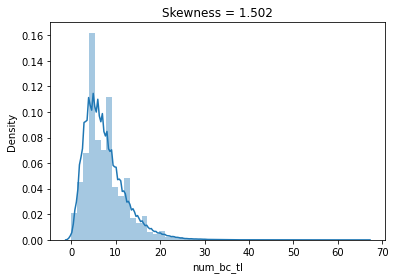

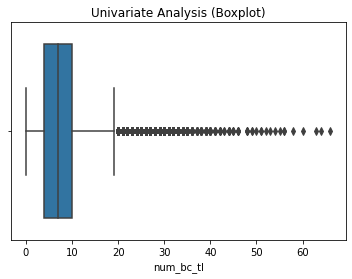

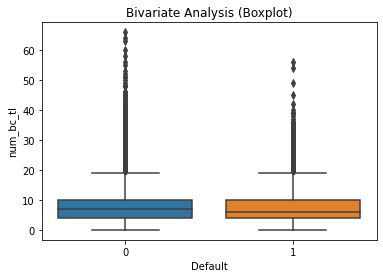

In [120]:
analysis(df5,'num_bc_tl','Default')

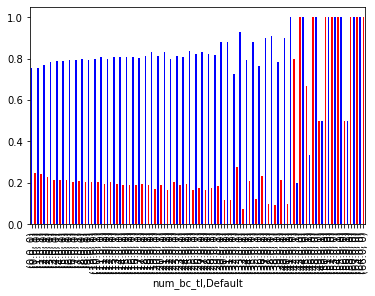

In [121]:
df5.groupby('num_bc_tl')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

# Inference: num_bc_tl
- Definition: provides information on the borrower's current credit utilization and shows the number of bankcard accounts the borrower is currently managing successfully. 
### Business understanding
- A higher number of bankcard accounts may indicate that the borrower has a higher amount of available credit and may be at a higher risk of default.
- No clear patter found from plot

====================================== num_il_tl ======================================


5 Point Summary
--------------------
count    188166.000000
mean          8.824958
std           7.577466
min           0.000000
25%           4.000000
50%           7.000000
75%          12.000000
max         138.000000
Name: num_il_tl, dtype: float64

Number of Inliers  : 0
Number of Outliers : 8412

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to num_il_tl


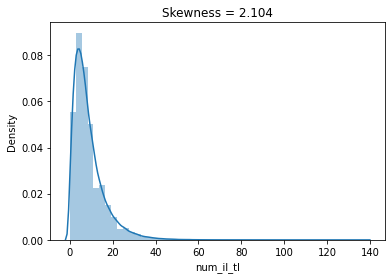

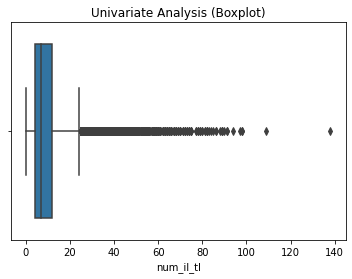

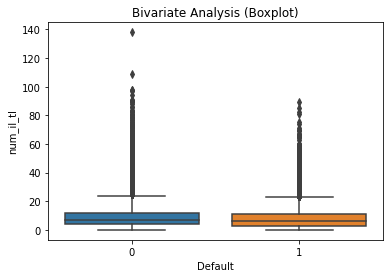

In [122]:
analysis(df5,'num_il_tl','Default')

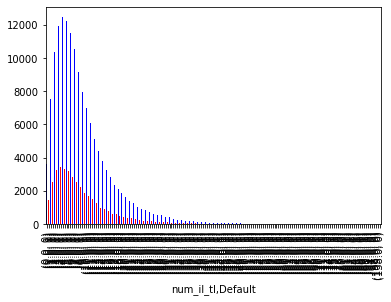

In [123]:
df5.groupby('num_il_tl')['Default'].value_counts().plot(kind = 'bar', color = ['b', 'r'])
plt.show()

# Inference: num_il_tl
- Definition: "num_il_tl" is a column in the Lending Club dataset that represents the number of installment accounts a borrower has.
### Business understanding
- A higher number of installment accounts may indicate that the borrower has a longer credit history and may have more experience managing credit.
- No clear trend is found from the plot.

====================================== num_op_rev_tl ======================================


5 Point Summary
--------------------
count    188166.000000
mean          8.232518
std           4.844091
min           0.000000
25%           5.000000
50%           7.000000
75%          11.000000
max          71.000000
Name: num_op_rev_tl, dtype: float64

Number of Inliers  : 0
Number of Outliers : 4445

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to num_op_rev_tl


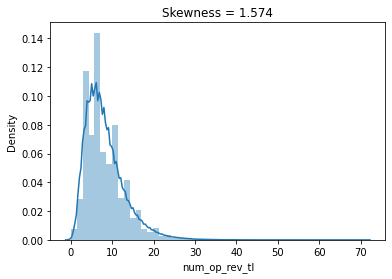

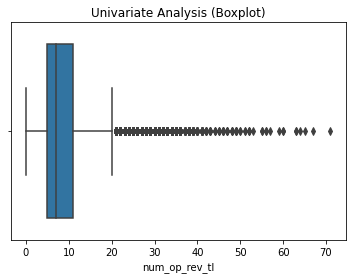

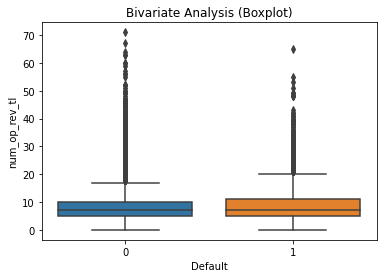

In [124]:
analysis(df5,'num_op_rev_tl','Default')

In [125]:
df5.groupby('Default')['num_op_rev_tl'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,8.200957,4.842332,0.0,5.0,7.0,10.0,71.0
1,38970.0,8.353349,4.848984,0.0,5.0,7.0,11.0,65.0


# Inference: num_op_rev_tl
- Definition: It provides information on the borrower's current credit utilization and shows the number of accounts the borrower is currently managing successfully. 
### Business understanding
- A higher number of open revolving accounts may indicate that the borrower has a higher amount of available credit and may be at a higher risk of default.
- No visible trend found from the plot.

====================================== num_rev_accts ======================================


5 Point Summary
--------------------
count    188166.000000
mean         13.791737
std           8.179079
min           2.000000
25%           8.000000
50%          12.000000
75%          18.000000
max         128.000000
Name: num_rev_accts, dtype: float64

Number of Inliers  : 0
Number of Outliers : 5146

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to num_rev_accts


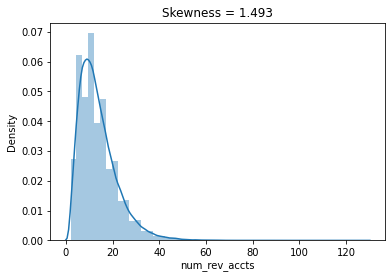

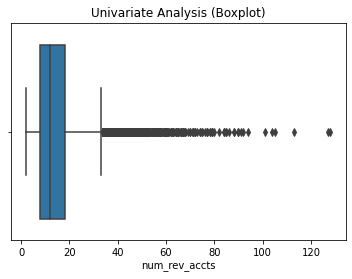

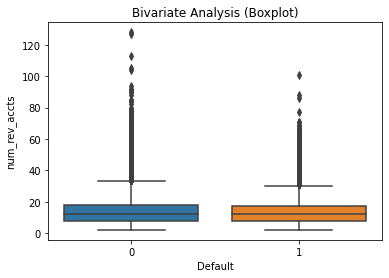

In [126]:
analysis(df5,'num_rev_accts','Default')

# Inference: num_rev_accts
- Defintion: provides information on the borrower's credit history and shows the number of accounts the borrower has opened where they can borrow money repeatedly up to a certain limit. 
### Business understanding
- A higher number of revolving accounts may indicate that the borrower has a longer credit history and may have more experience managing credit, but it may also indicate that the borrower has a higher amount of available credit and may be at a higher risk of default.
- No clear trend found from the plot.

# ---------------------------

====================================== num_rev_tl_bal_gt_0 ======================================


5 Point Summary
--------------------
count    188166.000000
mean          5.205170
std           3.215494
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          43.000000
Name: num_rev_tl_bal_gt_0, dtype: float64

Number of Inliers  : 0
Number of Outliers : 4293

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to num_rev_tl_bal_gt_0


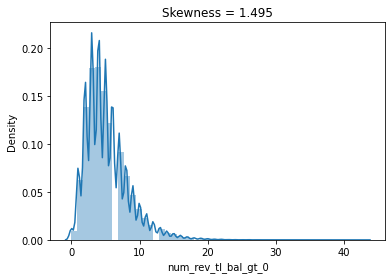

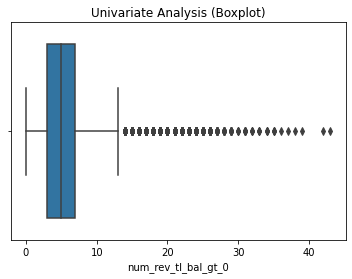

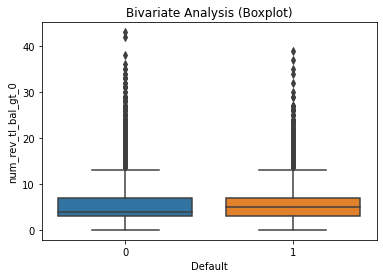

In [127]:
analysis(df5,'num_rev_tl_bal_gt_0','Default')

In [128]:
pd.crosstab(df5.Default, df5.num_rev_tl_bal_gt_0)

num_rev_tl_bal_gt_0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,42.0,43.0
Default,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1275,8518,18766,23703,23503,19917,15536,11403,8142,5694,3855,2692,1850,1295,906,659,428,320,190,166,114,72,56,27,23,19,17,11,10,8,2,6,2,3,2,2,1,0,1,0,1,1
1,297,1635,3770,5289,5661,5222,4307,3463,2629,1892,1358,1006,708,487,328,262,207,119,98,69,52,28,27,19,8,7,9,5,0,2,1,0,1,0,1,1,0,1,0,1,0,0


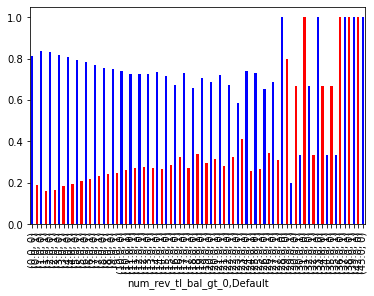

In [129]:
df5.groupby('num_rev_tl_bal_gt_0')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

# Inference: num_rev_tl_bal_gt_0
- Definition: "num_rev_tl_bal_gt_0" is a column in the Lending Club dataset that represents the number of revolving accounts a borrower has with a balance greater than zero.
### Business understanding
- A higher number of revolving accounts with a balance greater than zero may indicate that the borrower is using a higher amount of credit and may have a higher risk of default.
- A we infer that as the number of revolving accounts increases, possibility of default might increase, but this is not the only factor that default depend on.

====================================== num_sats ======================================


5 Point Summary
--------------------
count    188166.000000
mean         11.615659
std           5.794642
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          87.000000
Name: num_sats, dtype: float64

Number of Inliers  : 0
Number of Outliers : 7657

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.9446
Statistical Analysis (p-value) by using Anova test : 0.9446
Default is not related to num_sats


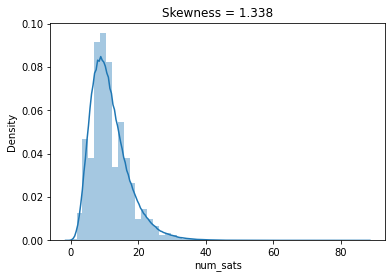

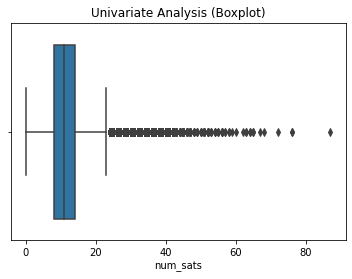

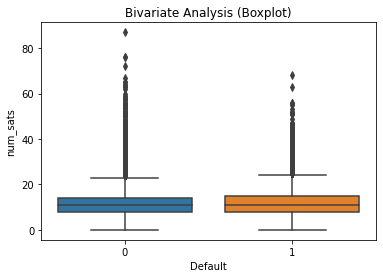

In [130]:
analysis(df5,'num_sats','Default')

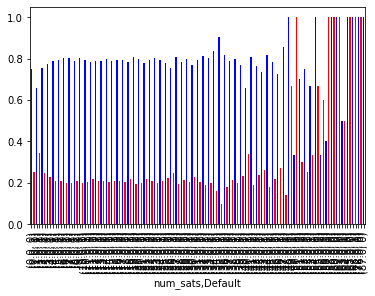

In [131]:
df5.groupby('num_sats')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

# Inference: num_sats
- Definition: "num_sats" is a column in the Lending Club dataset that represents the number of satisfactory accounts a borrower has.
### Business understanding
- A higher number of satisfactory accounts may indicate that the borrower is capable of managing credit well and may be less likely to default on a loan.
- No clear trend visible from the plot.

====================================== num_tl_90g_dpd_24m ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.083841
std           0.507753
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: num_tl_90g_dpd_24m, dtype: float64

Number of Inliers  : 0
Number of Outliers : 9925

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to num_tl_90g_dpd_24m


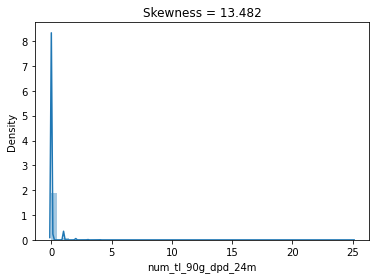

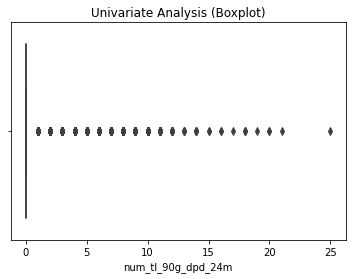

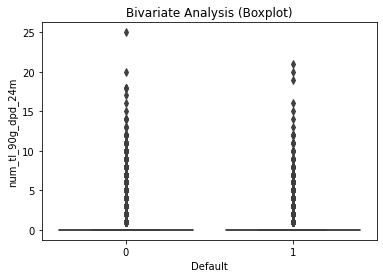

In [132]:
analysis(df5,'num_tl_90g_dpd_24m','Default')

In [133]:
pd.crosstab(df5.Default, df5.num_tl_90g_dpd_24m)


num_tl_90g_dpd_24m,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,25.0
Default,,,,,,,,,,,,,,,,,,,,,,,
0,141760,5609,973,312,182,104,82,50,30,24,25,19,11,3,4,1,1,1,3,0,1,0,1
1,36481,1874,357,103,48,27,23,18,12,8,4,4,4,1,1,1,1,0,0,1,1,1,0


In [134]:
df5.groupby('num_tl_90g_dpd_24m')['Default'].value_counts(normalize = True)

num_tl_90g_dpd_24m  Default
0.0                 0          0.795328
                    1          0.204672
1.0                 0          0.749566
                    1          0.250434
2.0                 0          0.731579
                    1          0.268421
3.0                 0          0.751807
                    1          0.248193
4.0                 0          0.791304
                    1          0.208696
5.0                 0          0.793893
                    1          0.206107
6.0                 0          0.780952
                    1          0.219048
7.0                 0          0.735294
                    1          0.264706
8.0                 0          0.714286
                    1          0.285714
9.0                 0          0.750000
                    1          0.250000
10.0                0          0.862069
                    1          0.137931
11.0                0          0.826087
                    1          0.173913
12.0        

# Inference: num_tl_90g_dpd_24m
- Definition: "num_tl_90g_dpd_24m" represents the number of accounts that have been 90 or more days past due in the past 24 months.
### Business understanding
- Borrowers with a higher number of accounts that have been 90 or more days past due may be seen as higher risk and may be less likely to be approved for a loan or may be offered higher interest rates.
- Borrowers with a lower number of accounts that have been 90 or more days past due may be seen as less risky and may qualify for better loan terms.
- We can infer that as people who are late in paying their other debts (installments) might default but this does not depend only on the number of late payment.

====================================== num_tl_op_past_12m ======================================


5 Point Summary
--------------------
count    188166.000000
mean          2.352216
std           1.988121
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          28.000000
Name: num_tl_op_past_12m, dtype: float64

Number of Inliers  : 0
Number of Outliers : 7168

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to num_tl_op_past_12m


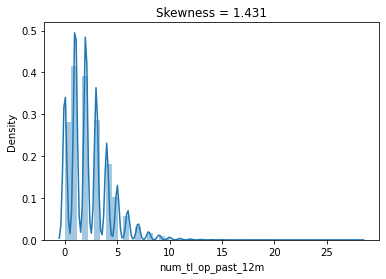

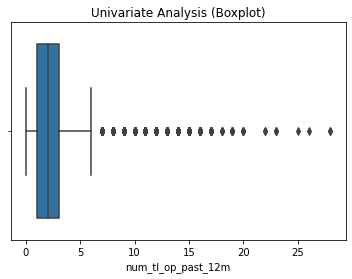

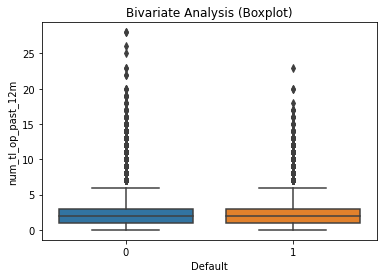

In [135]:
analysis(df5,'num_tl_op_past_12m','Default')

In [136]:
pd.crosstab(df5.Default, df5.num_tl_op_past_12m)

num_tl_op_past_12m,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,22.0,23.0,25.0,26.0,28.0
Default,,,,,,,,,,,,,,,,,,,,,,,,,,
0,23970,35200,32873,23815,14865,8418,4579,2559,1254,710,416,231,120,75,35,24,17,11,4,9,3,2,2,1,1,2
1,5768,8654,8398,6459,4207,2408,1384,780,394,249,111,62,44,21,13,4,6,4,1,0,2,0,1,0,0,0


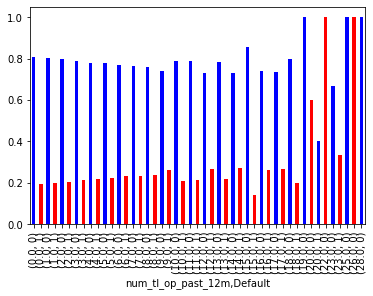

In [137]:
df5.groupby('num_tl_op_past_12m')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

# Inferences: num_tl_op_past_12m
- Definition: The "num_tl_op_past_12m" variable in the Lending Club dataset represents the number of accounts that a borrower has opened in the past 12 months.
### Business uderstanding
- A high number of installment accounts opened in the past 12 months may indicate that the borrower is taking on too much debt or may be experiencing financial difficulties. 
- On the other hand, a low number of accounts opened may indicate that the borrower has been more conservative in their borrowing and may be a more reliable borrower.
- We can infer that as people open more installment account (by taking debt) they might default but this does not depend only on the number of installment account.

====================================== pct_tl_nvr_dlq ======================================


5 Point Summary
--------------------
count    188165.000000
mean         94.117395
std           9.150599
min           0.000000
25%          91.300000
50%         100.000000
75%         100.000000
max         100.000000
Name: pct_tl_nvr_dlq, dtype: float64

Number of Inliers  : 12825
Number of Outliers : 0

Number of Missing Values : 1
Percent of Missing Values : 0.0005314456384256454

Statistical Analysis (p-value) by using Two Sample ttest : nan
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to pct_tl_nvr_dlq


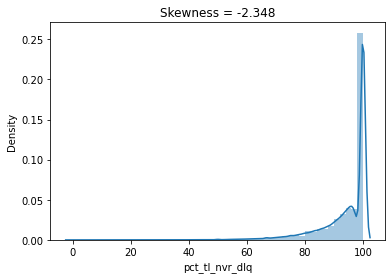

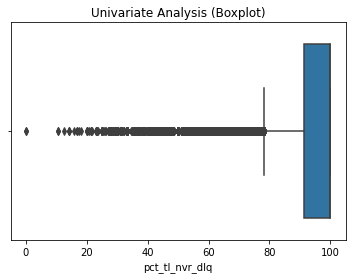

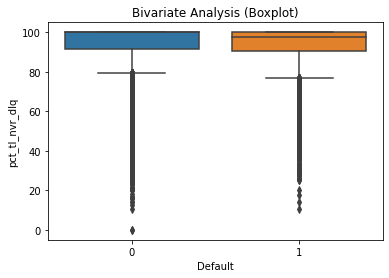

In [138]:
analysis(df5,'pct_tl_nvr_dlq','Default')

In [139]:
df5.groupby('Default')['pct_tl_nvr_dlq'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149195.0,94.227571,9.070496,0.0,91.7,100.0,100.0,100.0
1,38970.0,93.695591,9.439237,10.5,90.7,97.7,100.0,100.0


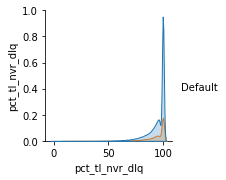

In [140]:
df_X = df5.loc[:, ['Default', 'pct_tl_nvr_dlq']]
sns.pairplot(df_X, hue = 'Default')
plt.show()

# Inferences: pct_tl_nvr_dlq
- The "pct_tl_nvr_dlq" variable in the Lending Club dataset represents the percentage of total credit lines that are currently not delinquent (i.e., never past due).
### Business understanding
Higher percentage indicate that the individual is standing good in terms of loan repayment.
- There is no clear visible pattern from the plot and statistical summary.

====================================== percent_bc_gt_75 ======================================


5 Point Summary
--------------------
count    185743.000000
mean         34.751624
std          35.306845
min           0.000000
25%           0.000000
50%          25.000000
75%          60.000000
max         100.000000
Name: percent_bc_gt_75, dtype: float64

Number of Inliers  : 0
Number of Outliers : 0

Number of Missing Values : 2423
Percent of Missing Values : 1.287692781905339

Statistical Analysis (p-value) by using Two Sample ttest : nan
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to percent_bc_gt_75


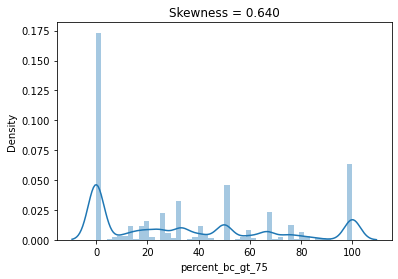

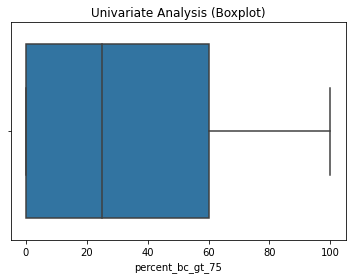

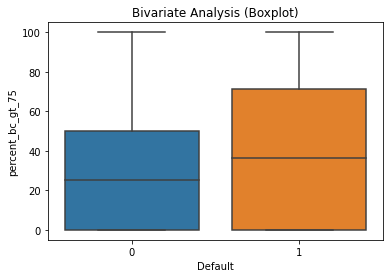

In [141]:
analysis(df5,'percent_bc_gt_75','Default')

In [142]:
df5.groupby('Default')['percent_bc_gt_75'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,147276.0,32.811417,34.821270,0.0,0.0,25.0,50.0,100.0
1,38467.0,42.179965,36.157819,0.0,0.0,36.4,71.4,100.0


# Inference: percent_bc_gt_75
- Definition: "percent_bc_gt_75" is a variable in the Lending Club dataset that represents the percentage of all bankcard accounts where the balance is greater than 75% of the credit limit for the borrower. 
- This variable can be a useful indicator of the borrower's credit utilization rate, which is an important factor in determining their creditworthiness.
### Business understanding
- Borrowers who have a higher credit utilization rate may be more likely to default on their loans (through Statistical summary) as they are already in debt so they might be not able to repay the loan amount.

====================================== pub_rec_bankruptcies ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.157154
std           0.390204
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: pub_rec_bankruptcies, dtype: float64

Number of Inliers  : 0
Number of Outliers : 28140

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to pub_rec_bankruptcies


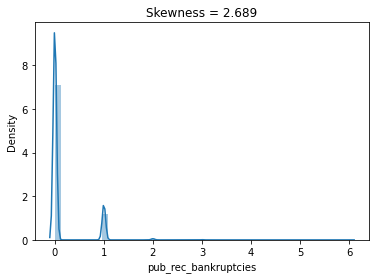

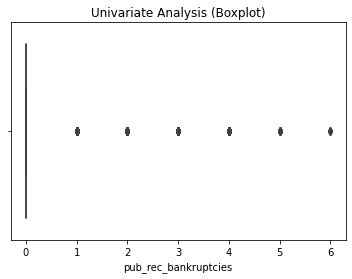

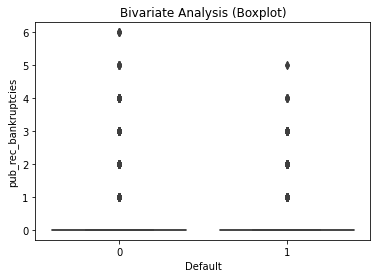

In [143]:
analysis(df5,'pub_rec_bankruptcies','Default')

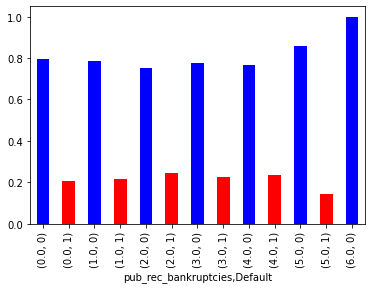

In [144]:
df5.groupby('pub_rec_bankruptcies')['Default'].value_counts(normalize = True).plot(kind = 'bar', color = ['b', 'r'])
plt.show()

In [145]:
pd.crosstab(df5.Default, df5.pub_rec_bankruptcies)

pub_rec_bankruptcies,0.0,1.0,2.0,3.0,4.0,5.0,6.0
Default,,,,,,,
0,127171,21174,677,123,33,12,6
1,32855,5846,221,36,10,2,0


# Inferences: pub_rec_bankruptcies
- Definition: "pub_rec_bankruptcies" is a variable in the Lending Club dataset that represents the number of public record bankruptcies filed by the borrower. 
### Business understanding
- Public record bankruptcies are legal filings that result in the borrower being released from their debts, but can have a negative impact on their credit score and credit history.
-  There is no clear pattern visible from the plot and statistical summary.

====================================== tax_liens ======================================


5 Point Summary
--------------------
count    188166.000000
mean          0.048893
std           0.356156
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: tax_liens, dtype: float64

Number of Inliers  : 0
Number of Outliers : 5758

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to tax_liens


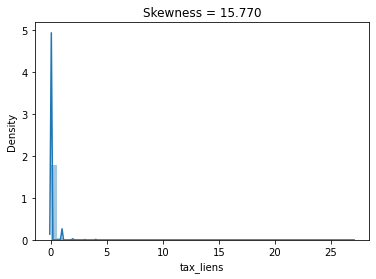

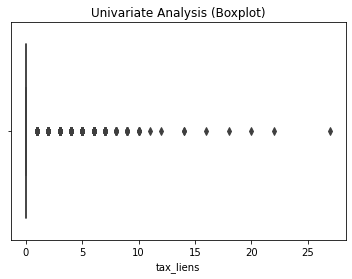

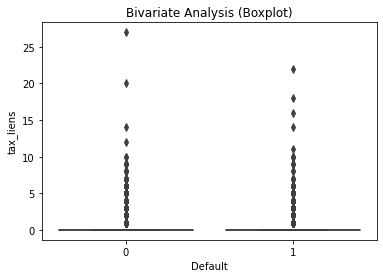

In [146]:
analysis(df5,'tax_liens','Default')

In [147]:
pd.crosstab(df5.Default, df5.tax_liens)

tax_liens,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,14.0,16.0,18.0,20.0,22.0,27.0
Default,,,,,,,,,,,,,,,,,,,
0,144930,2882,846,278,125,64,33,18,7,7,2,0,1,1,0,0,1,0,1
1,37478,1029,255,108,47,18,16,5,2,3,4,1,0,1,1,1,0,1,0


In [148]:
df5.groupby('tax_liens')['Default'].value_counts(normalize = True)

tax_liens  Default
0.0        0          0.794538
           1          0.205462
1.0        0          0.736896
           1          0.263104
2.0        0          0.768392
           1          0.231608
3.0        0          0.720207
           1          0.279793
4.0        0          0.726744
           1          0.273256
5.0        0          0.780488
           1          0.219512
6.0        0          0.673469
           1          0.326531
7.0        0          0.782609
           1          0.217391
8.0        0          0.777778
           1          0.222222
9.0        0          0.700000
           1          0.300000
10.0       1          0.666667
           0          0.333333
11.0       1          1.000000
12.0       0          1.000000
14.0       0          0.500000
           1          0.500000
16.0       1          1.000000
18.0       1          1.000000
20.0       0          1.000000
22.0       1          1.000000
27.0       0          1.000000
Name: Default, dtype

# Inference:  tax_liens
- Tax liens are legal claims made by a government entity against a property or asset owned by an individual or business entity who has failed to pay their taxes.
- The "tax_liens" variable represents the number of tax liens filed against the borrower.
### business understanding
- According to our data, around 96% of record of the borrowers are free from tax liens.
- As the number of tax liens increase, the possibility that the individual may default is increasing

====================================== tot_hi_cred_lim ======================================


5 Point Summary
--------------------
count    1.881660e+05
mean     1.852749e+05
std      1.865167e+05
min      0.000000e+00
25%      5.299700e+04
50%      1.201920e+05
75%      2.681098e+05
max      9.999999e+06
Name: tot_hi_cred_lim, dtype: float64

Number of Inliers  : 0
Number of Outliers : 6439

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to tot_hi_cred_lim


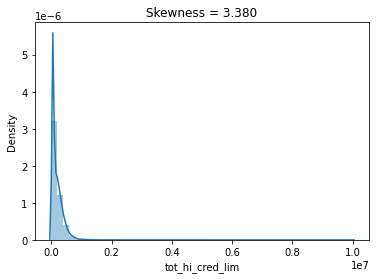

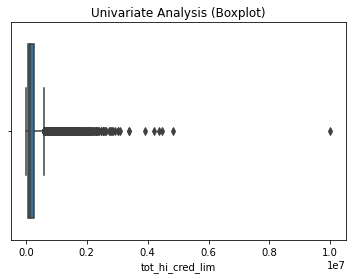

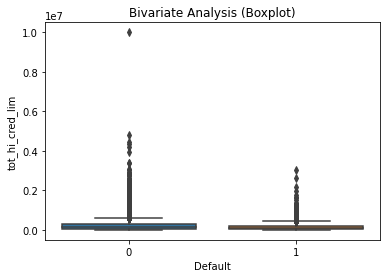

In [149]:
analysis(df5,'tot_hi_cred_lim','Default')

<Figure size 1080x576 with 0 Axes>

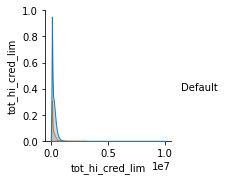

In [150]:
df_X = df5.loc[:, ['Default', 'tot_hi_cred_lim']]
plt.figure(figsize=(15,8))
sns.pairplot(df_X, hue = 'Default')
plt.show()

In [151]:
df5.groupby('Default')['tot_hi_cred_lim'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,194278.047689,192407.900807,0.0,55566.50,132840.0,280672.5,9999999.0
1,38970.0,150806.583936,157303.260908,0.0,45390.25,86772.5,213158.0,3035127.0


# Inference: tot_hi_cred_lim
- Definition: tot_hi_cred_lim is a variable in the Lending Club dataset that represents the total high credit/credit limit for all revolving and installment accounts. 
- This variable can provide insight into a borrower's overall creditworthiness and their ability to manage multiple credit lines.
### Business understanding
- This include the revolving credit accounts as well as mortgage accounts.
- There is a clear difference in the managing capability of the Defaulter and Non-Defaulters (by statistical summary).
- tot_hi_cred_lim is a variable that is correlated with loan status, with borrowers who have a higher total high credit/credit limit being more likely to have a good credit history and be able to manage their debt.

====================================== total_bal_ex_mort ======================================


5 Point Summary
--------------------
count    1.881660e+05
mean     5.112118e+04
std      5.165108e+04
min      0.000000e+00
25%      2.020800e+04
50%      3.747800e+04
75%      6.453825e+04
max      3.408095e+06
Name: total_bal_ex_mort, dtype: float64

Number of Inliers  : 0
Number of Outliers : 11334

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to total_bal_ex_mort


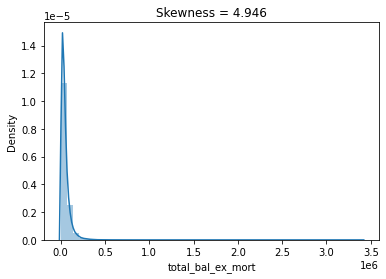

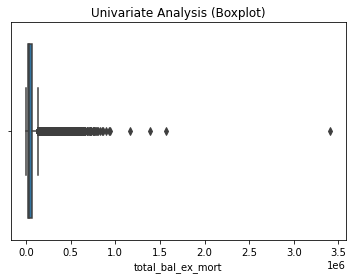

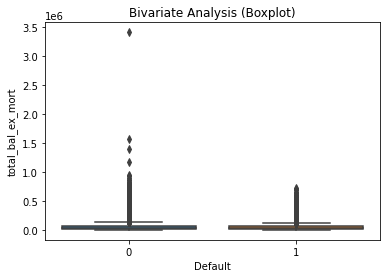

In [152]:
analysis(df5,'total_bal_ex_mort','Default')

In [153]:
df5.groupby('Default')['total_bal_ex_mort'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,51432.343742,52767.228154,0.0,20030.75,37443.0,64957.00,3408095.0
1,38970.0,49929.884501,47115.888697,0.0,20846.25,37639.5,62950.75,723895.0


# Inference: total_bal_ex_mort
- Definition: total_bal_ex_mort represents the total balance of all credit lines that are not mortgages for the borrower. 
### Business understanding
- This variable can provide insight into a borrower's overall debt load and ability to manage multiple lines of credit.
- Though there is not much we can infer from the plot and statistical summary.

====================================== total_bc_limit ======================================


5 Point Summary
--------------------
count    188166.000000
mean      24315.597069
std       23793.709061
min           0.000000
25%        8900.000000
50%       17400.000000
75%       31700.000000
max      460900.000000
Name: total_bc_limit, dtype: float64

Number of Inliers  : 0
Number of Outliers : 11089

Number of Missing Values : 0
Percent of Missing Values : 0.0

Statistical Analysis (p-value) by using Two Sample ttest : 0.0
Statistical Analysis (p-value) by using Anova test : 0.0
Default is related to total_bc_limit


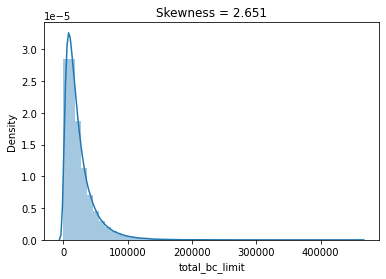

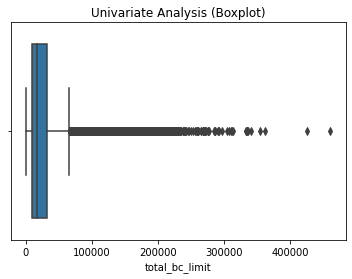

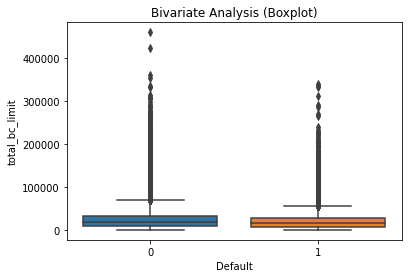

In [154]:
analysis(df5,'total_bc_limit','Default')

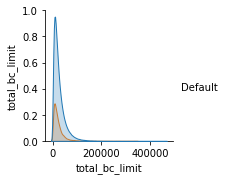

In [155]:
df_X = df5.loc[:, ['Default', 'total_bc_limit']]
sns.pairplot(df_X, hue = 'Default')

In [156]:
df5.groupby('Default')['total_bc_limit'].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,149196.0,25170.108910,24437.463312,0.0,9200.0,18000.0,33000.0,460900.0
1,38970.0,21044.112625,20827.475085,0.0,7800.0,15200.0,27100.0,340800.0


# Inference: total_bc_limit
- Definition: total_bc_limit represents the total credit limit of all credit cards that are part of the borrower's revolving credit accounts.
### Business understanding
- This variable can provide insight into a borrower's creditworthiness and ability to manage credit card debt.
- Customers with more credit card limit (combined) is an indication that their creditworthiness is better and according to that standard they are less likely to default.

### total_il_high_credit_limit
analysis(df5,'total_il_high_credit_limit','Default')

# Inference:  total_il_high_credit_limit
- Definition: total_il_high_credit_limit represents the total installment credit limit at the time the credit was last extended or the current balance if that balance is greater than the original credit limit. 
### Data leakage 
- **DATA LEAKAGE**: by definition it is on the current loan, so we must remove this feature.

# ---------------------------

In [157]:
df6 = df5.copy()

In [158]:
df6.shape

(188166, 75)

In [159]:

df6.drop(['int_rate'  ,'installment' , 'sub_grade' , 'grade'], axis = 1, inplace= True)

In [160]:
df6.shape

(188166, 71)

In [206]:
pd.DataFrame((df6.isnull().mean()[df6.isnull().mean()>0]*100).sort_values(ascending = True))

,0
pct_tl_nvr_dlq,0.000531
avg_cur_bal,0.003720
all_util,0.012223
revol_util,0.086626
bc_open_to_buy,1.285567
percent_bc_gt_75,1.287693
bc_util,1.344026
mo_sin_old_il_acct,2.681675
emp_length,6.728633
emp_title,6.961406


In [210]:
(df6.isnull().mean()[df6.isnull().mean()>0]).index

Index(['emp_title', 'emp_length', 'revol_util', 'il_util', 'all_util',
       'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75'],
      dtype='object')

-------------------------------

# 
# MISSING VALUE TREATMENT
# 

In [161]:
data = df6.copy()

## KNN Imputer
* Since il_util has approximately 13% missing values and we didnot get any relevant feature to fill the missing values so we are using KNN imputer for the same, as for 10% - 15% missing values KNN imputer works best.
* Number of Neighbours is kept as 5, which is the default value.

In [162]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
li=knn.fit_transform(pd.DataFrame(data['il_util']),data.Default)
data.il_util = li

## Simple Imputation
* We have simple imputation i.e., median for numerical feature and mode for Categorical features.

In [163]:
for i in data.columns[:-1]:
    if data[i].dtype==object:
        data.loc[data[i].isnull(),i]=data[i].mode()[0]
    else:
        data.loc[data[i].isnull(),i]=data[i].median()

In [167]:
import scipy.stats as stats

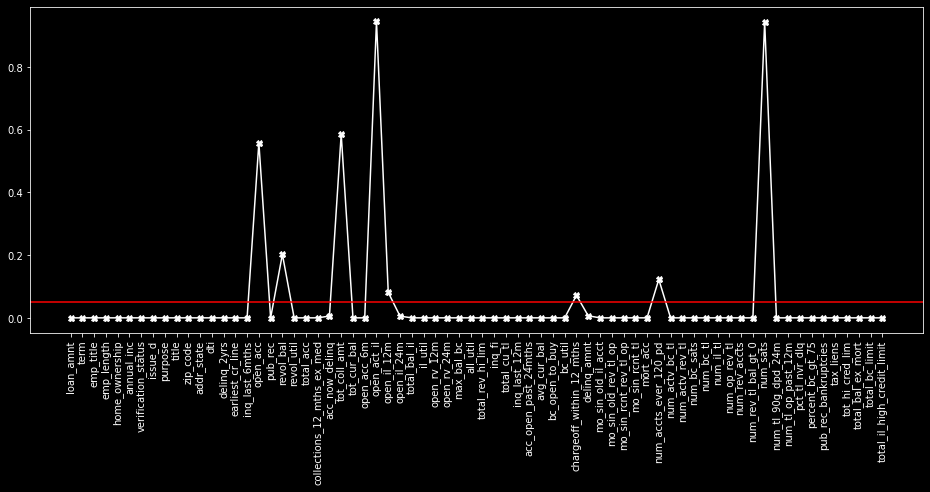

In [168]:
li1=[]
li2 = []
for i in data.columns[:-1]:
    if data[i].dtype ==object:
        li1.append(stats.chi2_contingency(pd.crosstab(data[i],data.Default))[1])
        li2.append(i)
    else:
        li1.append(stats.ttest_ind(data.loc[data.Default==1,i],data.loc[data.Default==0,i])[1])
        li2.append(i)
df = pd.DataFrame({'column':data.columns[:-1],'pvalue':li1})

plt.style.use('dark_background')
plt.figure(figsize=(16,6))
plt.plot(df.column,df.pvalue,marker='X',color='white',scaley=0.01)
plt.axhline(y=0.05,color='red')
plt.xticks(rotation=90)
plt.show()

--------------------

# Statistical Analysis:
* The RED horizontal line is representing P-Value at 5% Significance level.
* The number of markers above the line are representing the features which are not significant for the prediction of target statistically.
* Whereas, the number of markers below the lone are representing the features which are significant for the prediction of target statistically.

In [169]:
stat_df=pd.DataFrame({'Features':li2,'P Value':li1})

In [170]:
# Significant Columns with their p values :
stat_df.loc[stat_df['P Value']<0.05,:]

,Features,P Value
0,loan_amnt,0.000000e+00
1,term,0.000000e+00
2,emp_title,1.294797e-09
3,emp_length,4.260403e-15
4,home_ownership,0.000000e+00
5,annual_inc,3.567344e-62
6,verification_status,0.000000e+00
7,issue_d,0.000000e+00
8,purpose,5.546749e-122
9,title,8.898131e-123


In [171]:
# InSignificant Columns with their p values :
stat_df.loc[stat_df['P Value']>0.05,:]

,Features,P Value
16,open_acc,0.558559
18,revol_bal,0.202672
23,tot_coll_amt,0.585920
26,open_act_il,0.945609
27,open_il_12m,0.081123
43,chargeoff_within_12_mths,0.071813
50,num_accts_ever_120_pd,0.122577
59,num_sats,0.944595


# 
### DATA PREPROCESSING ( ENCODING AND SCALING ) , ( NOT DEALING WITH OUTLIERS FOR NOW )
# 

In [172]:
# Splitting the data into train and test sets for validation

from sklearn.model_selection import train_test_split
X = data.drop('Default',axis=1)
y = data.Default
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20,stratify=y,random_state=7)

In [173]:
# Doing target encoding on all the categorical features and standardizing the numerical columns
# for preprocessing

from category_encoders import TargetEncoder
te = TargetEncoder()
for i in xtrain.select_dtypes(include=object).columns:
    xtrain[i] = te.fit_transform(pd.DataFrame(xtrain[i]),ytrain)
    xtest[i]  = te.transform(pd.DataFrame(xtest[i]))

In [174]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mm = MinMaxScaler()
sc = StandardScaler()
for i in xtrain.select_dtypes(include=np.number).columns:
    xtrain[i]=sc.fit_transform(pd.DataFrame(xtrain[i]))
    xtest[i] =sc.transform(pd.DataFrame(xtest[i]))

<AxesSubplot: >

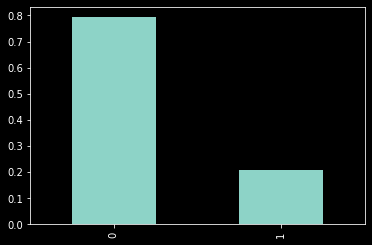

In [175]:
ytrain.value_counts(normalize=True).plot(kind='bar')

* Since our data is highly imbalanced with only 20 percent of the values corresponding to people who tend to default
* so we will use over sampling technique to balance the proportions of defaulters and non defaulters.

In [176]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smotex,smotey=smote.fit_resample(xtrain,ytrain)

* Since Statistical models only generate slope and not intercepts so we are adding a constant column so that the model is able to generate intercept.

In [177]:
from statsmodels.api import add_constant
smotex = add_constant(smotex)
xtest = add_constant(xtest)

In [178]:
smotex.shape,smotey.shape

((238712, 71), (238712,))

In [179]:
xtest.shape,ytest.shape

((37634, 71), (37634,))

# 
# MODELLING
# 

In [180]:
from sklearn.metrics import confusion_matrix,recall_score,classification_report,f1_score,accuracy_score,precision_score,\
roc_curve

In [181]:
# FITTING THE BASE MODEL WHICH IS MLE (maximum likelihood estimation)

from statsmodels.api import Logit
model_logit = Logit(smotey,smotex).fit()
yprob_test=model_logit.predict(xtest)
ypred_test=np.where(yprob_test>0.5,1,0)
yprob_train=model_logit.predict(smotex)
ypred_train=np.where(yprob_train>0.5,1,0)

Optimization terminated successfully.
         Current function value: 0.470480
         Iterations 6


# 
# MODEL SUMMARY
# 

In [182]:
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:               238712
Model:                          Logit   Df Residuals:                   238641
Method:                           MLE   Df Model:                           70
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3212
Time:                        14:04:32   Log-Likelihood:            -1.1231e+05
converged:                       True   LL-Null:                   -1.6546e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.6756      0.006   -113.056      0.000      -0.687      -0.664
loan_amnt                      0.3476      0.007     48.830      0.000       0.334       0.362
term                           0.2732      0.006     48.125      0.000       0.262       0.284
emp_title                      1.2898      0.006    207.084      0.000       1.278       1.302
emp_length                     0.0725      0.006     12.541      0.000       0.061       0.084
home_ownership                 0.1667      0.007     23.438      0.000       0.153       0.181
annual_inc                    -0.0385      0.012     -3.114      0.002      -0.063      -0.014
verification_status            0.1225      0.006     21.403      0.000       0.111       0.134
issue_d                        0.4587      0.007     62.113      0.000       0.444       0.473
purpose                        0.2162      0.216      1.003      0.316      -0.206       0.639
title                         -0.1113      0.216     -0.516      0.606      -0.534       0.311
zip_code                       0.2506      0.007     34.667      0.000       0.236       0.265
addr_state                     0.0321      0.007      4.368      0.000       0.018       0.046
dti                            0.2466      0.008     31.361      0.000       0.231       0.262
delinq_2yrs                    0.1146      0.008     13.690      0.000       0.098       0.131
earliest_cr_line               0.1387      0.006     22.555      0.000       0.127       0.151
inq_last_6mths                 0.1483      0.007     22.281      0.000       0.135       0.161
open_acc                       0.2010      0.130      1.546      0.122      -0.054       0.456
pub_rec                       -0.1104      0.018     -6.151      0.000      -0.146      -0.075
revol_bal                     -0.0101      0.030     -0.337      0.736      -0.069       0.049
revol_util                     0.1799      0.015     12.242      0.000       0.151       0.209
total_acc                     -0.1729      0.135     -1.285      0.199      -0.437       0.091
collections_12_mths_ex_med     0.0375      0.005      7.269      0.000       0.027       0.048
acc_now_delinq                 0.0215      0.005      4.248      0.000       0.012       0.031
tot_coll_amt                  -0.0105      0.009     -1.184      0.236      -0.028       0.007
tot_cur_bal                    0.4468      0.067      6.656      0.000       0.315       0.578
open_acc_6m                    0.0539      0.008      6.355      0.000       0.037       0.071
open_act_il                    0.0422      0.035      1.191      0.234      -0.027       0.112
open_il_12m                   -0.0051      0.021     -0.239      0.811      -0.046       0.036
open_il_24m                   -0.0403      0.027     -1.517      0.129      -0.092       0.012
total_bal_il                  -0.0195      0.053     -0.371      0.711      -0.123       0.084
il_util    

Confusion Matrix 
--------------------------------
 [[93933 25423]
 [26137 93219]] 

Accuracy Score  : 78.4 %
PRECISION SCORE : 78.60000000000001 %
RECALL SCORE    : 78.10000000000001 %
F1 SCORE        : 78.3 %
                     CLASSIFICATION REPORT 
                 ---------------------------
               precision    recall  f1-score   support

           0       0.78      0.79      0.78    119356
           1       0.79      0.78      0.78    119356

    accuracy                           0.78    238712
   macro avg       0.78      0.78      0.78    238712
weighted avg       0.78      0.78      0.78    238712



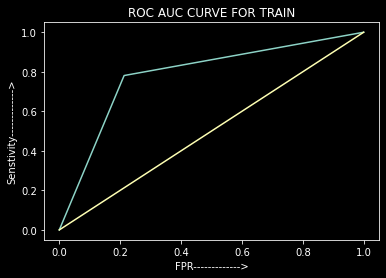

In [183]:
print('Confusion Matrix \n--------------------------------\n',confusion_matrix(smotey,ypred_train),'\n')
print('Accuracy Score  :',round(accuracy_score(smotey,ypred_train),3)*100,'%')
print('PRECISION SCORE :',round(precision_score(smotey,ypred_train),3)*100,'%')
print('RECALL SCORE    :',round(recall_score(smotey,ypred_train),3)*100,'%')
print('F1 SCORE        :',round(f1_score(smotey,ypred_train),3)*100,'%')
print(' '*20,'CLASSIFICATION REPORT \n',' '*15,'---------------------------\n',classification_report(smotey,ypred_train))
fpr,tpr,thres = roc_curve(smotey,ypred_train)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel("FPR------------->")
plt.ylabel("Senstivity------------->")
plt.title('ROC AUC CURVE FOR TRAIN')
plt.show()

Confusion Matrix 
--------------------------------
 [[21812  8028]
 [ 3707  4087]] 

Accuracy Score : 68.8 %
PRECISION SCORE : 33.7 %
RECALL SCORE : 52.400000000000006 %
F1 SCORE : 41.099999999999994 %
                     CLASSIFICATION REPORT 
                 ---------------------------
               precision    recall  f1-score   support

           0       0.85      0.73      0.79     29840
           1       0.34      0.52      0.41      7794

    accuracy                           0.69     37634
   macro avg       0.60      0.63      0.60     37634
weighted avg       0.75      0.69      0.71     37634



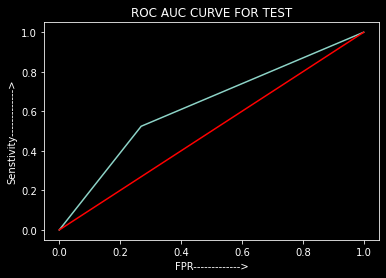

In [184]:
print('Confusion Matrix \n--------------------------------\n',confusion_matrix(ytest,ypred_test),'\n')
print('Accuracy Score :',round(accuracy_score(ytest,ypred_test),3)*100,'%')
print('PRECISION SCORE :',round(precision_score(ytest,ypred_test),3)*100,'%')
print('RECALL SCORE :',round(recall_score(ytest,ypred_test),3)*100,'%')
print('F1 SCORE :',round(f1_score(ytest,ypred_test),3)*100,'%')
print(' '*20,'CLASSIFICATION REPORT \n',' '*15,'---------------------------\n',classification_report(ytest,ypred_test))
fpr,tpr,thres=roc_curve(ytest,ypred_test)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='red')
plt.xlabel("FPR------------->")
plt.ylabel("Senstivity------------->")
plt.title('ROC AUC CURVE FOR TEST')
plt.show()

# 
# FEATURE SIGNIFICANCE
# 

In [185]:
model_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:               238712
Model:                          Logit   Df Residuals:                   238641
Method:                           MLE   Df Model:                           70
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3212
Time:                        14:04:33   Log-Likelihood:            -1.1231e+05
converged:                       True   LL-Null:                   -1.6546e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.6756      0.006   -113.056      0.000      -0.687      -0.664
loan_amnt                      0.3476      0.007     48.830      0.000       0.334       0.362
term                           0.2732      0.006     48.125      0.000       0.262       0.284
emp_title                      1.2898      0.006    207.084      0.000       1.278       1.302
emp_length                     0.0725      0.006     12.541      0.000       0.061       0.084
home_ownership                 0.1667      0.007     23.438      0.000       0.153       0.181
annual_inc                    -0.0385      0.012     -3.114      0.002      -0.063      -0.014
verification_status            0.1225      0.006     21.403      0.000       0.111       0.134
issue_d                        0.4587      0.007     62.113      0.000       0.444       0.473
purpose                        0.2162      0.216      1.003      0.316      -0.206       0.639
title                         -0.1113      0.216     -0.516      0.606      -0.534       0.311
zip_code                       0.2506      0.007     34.667      0.000       0.236       0.265
addr_state                     0.0321      0.007      4.368      0.000       0.018       0.046
dti                            0.2466      0.008     31.361      0.000       0.231       0.262
delinq_2yrs                    0.1146      0.008     13.690      0.000       0.098       0.131
earliest_cr_line               0.1387      0.006     22.555      0.000       0.127       0.151
inq_last_6mths                 0.1483      0.007     22.281      0.000       0.135       0.161
open_acc                       0.2010      0.130      1.546      0.122      -0.054       0.456
pub_rec                       -0.1104      0.018     -6.151      0.000      -0.146      -0.075
revol_bal                     -0.0101      0.030     -0.337      0.736      -0.069       0.049
revol_util                     0.1799      0.015     12.242      0.000       0.151       0.209
total_acc                     -0.1729      0.135     -1.285      0.199      -0.437       0.091
collections_12_mths_ex_med     0.0375      0.005      7.269      0.000       0.027       0.048
acc_now_delinq                 0.0215      0.005      4.248      0.000       0.012       0.031
tot_coll_amt                  -0.0105      0.009     -1.184      0.236      -0.028       0.007
tot_cur_bal                    0.4468      0.067      6.656      0.000       0.315       0.578
open_acc_6m                    0.0539      0.008      6.355      0.000       0.037       0.071
open_act_il                    0.0422      0.035      1.191      0.234      -0.027       0.112
open_il_12m                   -0.0051      0.021     -0.239      0.811      -0.046       0.036
open_il_24m                   -0.0403      0.027     -1.517      0.129      -0.092       0.012
total_bal_il                  -0.0195      0.053     -0.371      0.711      -0.123       0.084
il_util    

# MODEL SUMMARY

1. The psuedo r square is coming out to be 32 percent so we can say that the model is not performing well enough.
2. Log likelihood is increased by a significant number as compared to the likelihood of null model but is still having a very high log loss.
3. LLR p valueis coming out to be 0 so we can say that our model is significant.
4. The coefficient value is coming to be -0.6738.

In [186]:
pval = model_logit.pvalues

In [187]:
ins_c = pval[pval<0.05]

In [188]:
# As per our LOGIT model out of all the features used, these features are found to be significant

['const', 'loan_amnt', 'term', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'pub_rec', 'revol_util', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_cur_bal', 'open_acc_6m', 'open_act_il',
       'il_util', 'max_bal_bc', 'total_rev_hi_lim', 'total_cu_tl',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'num_accts_ever_120_pd', 'num_bc_tl',
       'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit']

['const',
 'loan_amnt',
 'term',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'pub_rec',
 'revol_util',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'il_util',
 'max_bal_bc',
 'total_rev_hi_lim',
 'total_cu_tl',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_bc_tl',
 'num_op_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_90g_dpd_24m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit']

# 
# FITTING BASE MODEL AGAIN AFTER REMOVING INSIGNIFICANT FEATURES
# 

In [189]:
smotex_imp = smotex.loc[:,ins_c.index]
xtest_imp = xtest.loc[:,ins_c.index]

In [190]:
model_imp = Logit(smotey,smotex_imp).fit()

Optimization terminated successfully.
         Current function value: 0.471764
         Iterations 6


In [191]:
ypred = np.where(model_imp.predict(xtest_imp)>0.5,1,0)

In [192]:
print('Confusion Matrix ')
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

Confusion Matrix 
[[21824  8016]
 [ 3709  4085]]
              precision    recall  f1-score   support

           0       0.85      0.73      0.79     29840
           1       0.34      0.52      0.41      7794

    accuracy                           0.69     37634
   macro avg       0.60      0.63      0.60     37634
weighted avg       0.75      0.69      0.71     37634



* As we can see by using significant features, our model didn't perform well so we can say that LOGIT model is not a good model for prediction of Defaulters in this dataset.
* So, for better predicitons we will use scikit learn linear models and ensemble models.

In [193]:
fpr,tpr,thres = roc_curve(ytest,model_imp.predict(xtest_imp))

In [194]:
yo = pd.DataFrame({'fpr':fpr,'tpr':tpr,'thres':thres})

In [195]:
yo['yoden'] = yo.tpr - yo.fpr

In [196]:
yo.sort_values('yoden',ascending=False)

,fpr,tpr,thres,yoden
7735,0.447621,0.724275,3.356603e-01,0.276654
7733,0.447554,0.724147,3.357859e-01,0.276593
7739,0.448224,0.724788,3.352333e-01,0.276564
7569,0.434786,0.711316,3.460174e-01,0.276531
7734,0.447621,0.724147,3.356910e-01,0.276526
...,...,...,...,...
4,0.000101,0.000257,9.980737e-01,0.000156
1,0.000000,0.000128,9.996520e-01,0.000128
2,0.000067,0.000128,9.985259e-01,0.000061
0,0.000000,0.000000,1.999652e+00,0.000000


In [197]:
print(classification_report(ytest,np.where(model_imp.predict(xtest_imp)>0.3398,1,0)))

              precision    recall  f1-score   support

           0       0.88      0.56      0.68     29840
           1       0.30      0.72      0.42      7794

    accuracy                           0.59     37634
   macro avg       0.59      0.64      0.55     37634
weighted avg       0.76      0.59      0.63     37634



In [198]:
model_imp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:               238712
Model:                          Logit   Df Residuals:                   238665
Method:                           MLE   Df Model:                           46
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                  0.3194
Time:                        14:04:35   Log-Likelihood:            -1.1262e+05
converged:                       True   LL-Null:                   -1.6546e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.6685      0.006   -112.357      0.000      -0.680      -0.657
loan_amnt                      0.3505      0.007     49.601      0.000       0.337       0.364
term                           0.2706      0.006     47.801      0.000       0.259       0.282
emp_title                      1.2937      0.006    208.477      0.000       1.282       1.306
emp_length                     0.0741      0.006     12.913      0.000       0.063       0.085
home_ownership                 0.1710      0.007     25.041      0.000       0.158       0.184
annual_inc                    -0.0467      0.012     -4.034      0.000      -0.069      -0.024
verification_status            0.1339      0.006     23.646      0.000       0.123       0.145
issue_d                        0.4586      0.007     62.458      0.000       0.444       0.473
zip_code                       0.2508      0.007     34.757      0.000       0.237       0.265
addr_state                     0.0303      0.007      4.144      0.000       0.016       0.045
dti                            0.2288      0.007     34.896      0.000       0.216       0.242
delinq_2yrs                    0.1034      0.008     12.447      0.000       0.087       0.120
earliest_cr_line               0.1419      0.006     23.127      0.000       0.130       0.154
inq_last_6mths                 0.1472      0.006     24.687      0.000       0.136       0.159
pub_rec                       -0.1111      0.018     -6.195      0.000      -0.146      -0.076
revol_util                     0.1726      0.010     17.498      0.000       0.153       0.192
collections_12_mths_ex_med     0.0370      0.005      7.215      0.000       0.027       0.047
acc_now_delinq                 0.0226      0.005      4.551      0.000       0.013       0.032
tot_cur_bal                    0.4887      0.050      9.775      0.000       0.391       0.587
open_acc_6m                    0.0680      0.007      9.381      0.000       0.054       0.082
il_util                        0.0973      0.006     15.815      0.000       0.085       0.109
max_bal_bc                    -0.0999      0.012     -8.645      0.000      -0.123      -0.077
total_rev_hi_lim              -0.0859      0.013     -6.639      0.000      -0.111      -0.061
total_cu_tl                   -0.0822      0.006    -13.622      0.000      -0.094      -0.070
acc_open_past_24mths           0.0880      0.008     11.006      0.000       0.072       0.104
avg_cur_bal                   -0.0808      0.014     -5.727      0.000      -0.108      -0.053
bc_open_to_buy                -0.1625      0.020     -8.159      0.000      -0.202      -0.124
chargeoff_within_12_mths       0.0106      0.005      1.985      0.047       0.000       0.021
delinq_amnt                    0.0294      0.006      5.091      0.000       0.018       0.041
mo_sin_old_il_acct             0.0310      0.006      5.176      0.000       0.019       0.043
mo_sin_old_

# 
# BASIC ANALYSIS AND MODELLING COMPLETE !